Ks_2sampResult(statistic=0.080952380952380942, pvalue=0.82540301424495821)


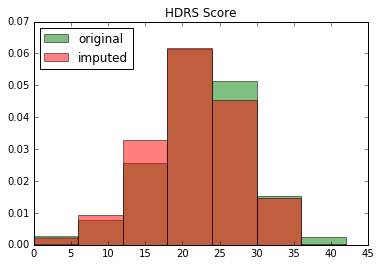

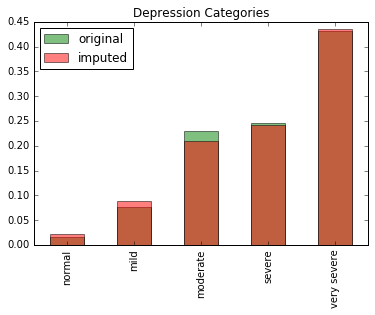

In [175]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

fig_dir = 'HDRS_imputation/figs/'

def add_label(series):
    if series['HAMD']>=0 and series['HAMD']<8:
        series['label'] = 'normal'
    elif series['HAMD']>=8 and series['HAMD']<14:
        series['label'] = 'mild'
    elif series['HAMD']>=14 and series['HAMD']<19:
        series['label'] ='moderate'
    elif series['HAMD']>=19 and series['HAMD']<23:
        series['label'] = 'severe'
    elif series['HAMD']>=23:
        series['label'] = 'very severe' 
    #max score is 52
    return series

def plot_hist(HAMD1, ttl1, c1, HAMD2, ttl2, c2):
    plot_single_hist(HAMD1, ttl1, c1)
    plot_single_hist(HAMD2, ttl2, c2)
    plt.title('HDRS Score')
    plt.savefig(fig_dir+'HDRS_histogram.pdf', transparent=True, format='pdf', bbox_inches='tight')
    plt.show()
    
def plot_single_hist(df, lbl, c):
    bs = range(0,46,6)
    plt.hist(df['HAMD'], bins=bs, alpha=0.5, label=lbl, normed=True, color=c)
    plt.legend(loc="upper left")

def plot_categories(HAMD1, ttl1, c1, HAMD2, ttl2, c2):
    plot_single_categories(HAMD1, ttl1, c1)
    plot_single_categories(HAMD2, ttl2, c2)
    plt.title('Depression Categories')
    plt.savefig(fig_dir+'HDRS_categories.pdf', transparent=True, format='pdf', bbox_inches='tight')
    plt.show()
    
def plot_single_categories(df, lbl, c):
    df = df.apply(add_label, axis=1)
    categories = df['label'].value_counts().reindex(['normal', 'mild', 'moderate', 'severe', 'very severe'])
    categories /= len(df)
    categories.plot(kind='bar', alpha=0.5, label=lbl, color=c)
    plt.legend(loc="upper left")
    
    

HAMD1 = pd.read_csv('data/HAMD_original.csv')
HAMD1 = HAMD1[HAMD1['ID']!='M005']
HAMD2 = pd.read_csv('data/HAMD_imputed_survey.csv')
HAMD3 = pd.read_csv('data/HAMD_imputed_linear.csv')
HAMD3 = HAMD3[HAMD3['ID']!='M005']

def compare_HAMD(HAMD1, ttl1, c1, HAMD2, ttl2, c2):
    print stats.ks_2samp(HAMD1['HAMD'], HAMD2['HAMD'])
    plot_hist(HAMD1, ttl1, c1, HAMD2, ttl2, c2)
    plot_categories(HAMD1, ttl1, c1, HAMD2, ttl2, c2)
    
compare_HAMD(HAMD1, 'original', 'g', HAMD2, 'imputed', 'r')
# compare_HAMD(HAMD1, 'original', 'g', HAMD3, 'linear', 'r')
# plot_histogram('data/HAMD_original.csv', 'original', 'g')
# plot_histogram('data/HAMD_imputed_linear.csv', 'linear', 'b')
# plot_histogram('data/HAMD_imputed_survey.csv', 'smart', 'r')


#Feature Creation

In [55]:
import pandas as pd
import numpy as np
import os
HC = ['M001','M002', 'M014', 'M021']
MDD = ['M004', 'M005', 'M006', 'M008', 'M011', 'M012', 'M013', 'M015', 'M016', 'M017', 'M020', 'M022']
outliers = ['M007', 'M018', 'M023'] #dropped out. any user that needs to be removed. for example is in the HAMD scores but doesn't have data or vice versa
NO_OUTGOING_SMS = ['M006', 'M008', 'M011', 'M013', 'M014', 'M015', 'M016', 'M018', 'M020']
NEEDS_CLEANING=['M007', 'M008','M011','M015', 'M020', 'M022']

data_dir = 'data/'
survey_dir = data_dir + 'raw_survey/'
feature_dir = data_dir + 'features/'
raw_log_dir = data_dir + 'raw_logs/'
combined_log_dir = data_dir + 'combined_logs/'

ACC_THRESHOLD = 1000 # radius accuracy in meters for location data

def date_index2str(series):
    series['date'] = series['datetime'].strftime('%Y-%m-%d')
    return series
#sensor_data_dir='sleep_sensor_data/'



In [59]:
from sklearn.cluster import KMeans
import numpy as np

def location_clustering():
    #not yet working
    X = np.array(df[['lat', 'long']])
    # X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    print kmeans.labels_
    print kmeans.predict([[0, 0], [4, 4]])
    print kmeans.cluster_centers_


In [60]:

#######################    Daily dataset for all users phone call activity    #######################

DIR = combined_log_dir



df_all = pd.DataFrame()
for dname in os.listdir(DIR):
    if dname.startswith('.') or '-' in dname or '_' in dname:
        continue


    fname = DIR+dname + '/AppUsage_edited.csv'
    df = pd.read_csv(fname, header=None)
    df.columns = ['timestamp', 'action', 'info', 'datetime']

    df_all = df_all.append(df, ignore_index=True)

def app_name(series):
    txt = series['info']
    txt = txt[0:txt.find('/')]
    series['info'] = txt
    return series
df = df.apply(app_name, axis = 1)
print np.unique(df['info'])

['air.com.sgn.bookoflife.gp' 'android' 'com.android.calendar'
 'com.android.chrome' 'com.android.contacts' 'com.android.email'
 'com.android.incallui' 'com.android.mms' 'com.android.packageinstaller'
 'com.android.phone' 'com.android.providers.media' 'com.android.settings'
 'com.android.systemui' 'com.android.vending' 'com.cleanmaster.mguard_x86'
 'com.cleanmaster.security' 'com.creditkarma.mobile' 'com.dropbox.android'
 'com.facebook.katana' 'com.facebook.orca' 'com.google.android.apps.docs'
 'com.google.android.apps.maps' 'com.google.android.gm'
 'com.google.android.gms' 'com.google.android.googlequicksearchbox'
 'com.google.android.youtube' 'com.ifs.banking.fiid4496'
 'com.macys.android' 'com.mastercard.directexpress'
 'com.metropcs.service.vvm' 'com.mobileposse.client'
 'com.movisens.xs.android.core' 'com.nuance.nmc.sihome.metropcs'
 'com.rcn.mobile' 'com.sec.android.app.camera'
 'com.sec.android.app.clockpackage' 'com.sec.android.app.launcher'
 'com.sec.android.app.popupcalculator

In [62]:
df_agg

,date,_sum_call_duration,_std_call_duration,_mean_call_duration,_median_call_duration,_count_call,ID
type,,,,,,,
Incoming,2016-05-09,22,NaN,22.000000,22.0,1,M001
Outgoing,2016-05-10,250,NaN,250.000000,250.0,1,M001
Incoming,2016-05-11,118,NaN,118.000000,118.0,1,M001
,2016-05-12,0,NaN,0.000000,0.0,1,M001
IncomingMissed,2016-05-13,0,NaN,0.000000,0.0,1,M001
Outgoing,2016-05-13,82,NaN,82.000000,82.0,1,M001
Incoming,2016-05-14,144,74.953319,72.000000,72.0,2,M001
Incoming,2016-05-18,1878,978.351164,626.000000,96.0,3,M001
Outgoing,2016-05-18,34,NaN,34.000000,34.0,1,M001


In [64]:
def create_display_features():
    #not working
    grouped = df[df['on']==1][['time_diff', 'date']].groupby(['date'])
    df_agg = grouped.agg([np.sum, np.std, np.mean, np.median, 'count'])
    df_agg.columns = [' '.join(col).strip() for col in df_agg.columns.values]
    df_agg.columns = ['sum', 'std', 'mean', 'median', 'count']
    df_agg['ID'] = dname
    df_agg.reset_index(level=0, inplace=True)
    df_agg

In [66]:
def calculate_daily_display(day_hours):

    df_all=pd.DataFrame()
    for dname in os.listdir(DIR):
        if dname.startswith('.') or '-' in dname or '_' in dname:
            continue
        if dname != 'M001':
            continue

        fname = DIR+dname + '/DiplayOn_edited.csv'
        df = pd.read_csv(fname, header=None)
        df.columns = ['timestamp','on','datetime']
        df['time_diff'] = -df['timestamp'].diff(periods=-1)
        df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')
        df = df.apply(date_index2str, axis=1)

        if day_hours==True:
            mask = df.datetime.apply(lambda x: x.hour>MIN_HOUR and x.hour<=MAX_HOUR)
            df=df.loc[mask]



        grouped = df[df['on' == 1]][['time_diff', 'date']].groupby(['date'])
        df_agg = grouped.agg([np.sum, np.std, np.mean, np.median, 'count'])

        df_agg.columns = [' '.join(col).strip() for col in df_agg.columns.values]
        df_agg.columns = ['sum', 'std', 'mean', 'median', 'count']
        df_agg['ID'] = dname
        df_agg.reset_index(level=0, inplace=True)


        df_all = df_all.append(df_agg, ignore_index=True)

    return df_all[['ID','count','lat_std', 'lat_mean', 'lat_median', 'long_std', 'long_mean', 'long_median','total_std']]


# not working now
# df_daily = calculate_daily_display(day_hours=False)
# df_daily = df_daily.sort(['ID','date']).reset_index(drop=True)

# df_daily.to_csv(feature_dir+'daily_display.csv')

#Moved from the old folder

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize
import sklearn
from sklearn.preprocessing import StandardScaler
import scipy
import matplotlib

output_dir = 'MLHC_data/'
input_dir = 'data/raw_survey/'
sensor_data_dir='sleep_sensor_data/'

HC=['M001','M002', 'M014', 'M021'] 
MDD=['M004', 'M005', 'M006', 'M008', 'M011', 'M012', 'M013', 'M015', 'M016', 'M017', 'M020', 'M022']
outliers=['M007', 'M018', 'M023'] #dropped out. any user that needs to be removed. for example is in the HAMD scores but doesn't have data or vice versa
NO_OUTGOING_SMS=['M006', 'M008', 'M011', 'M013', 'M014', 'M015', 'M016', 'M018', 'M020']

#Create total daily dataset
###Read data

In [72]:
def create_PANAS_dataset(group, ID):
    df = pd.read_csv(input_dir+ID+'.csv')
    df = df [df['Form'] != 'Settings']
    df = df [df['Form'] != 'Audio recording']
    df['ID'] = ID
    df['group'] = group
    def calc_total_affect_score(series):
        series['total_PA1'] = (series['interested'] + series['excited'] + series['strong'] + series['enthusiastic'] + series['proud'])/5.0
        series['total_NA1'] = (series['distressed'] + series['upset'] + series['guilty'] +series['scared'] + series['hostile'])/5.0
        series['total_PA2'] = (series['alert'] + series['inspired'] + series['determined'] + series['attentive'] +  series['active'])/5.0
        series['total_NA2'] = (series['irritable'] + series['ashamed'] + series['nervous'] + series['jittery'] + series['afraid'])/5.0
        series['form_duration'] = (datetime.strptime(series['Form_finish_time'], '%H:%M:%S')-datetime.strptime(series['Form_start_time'], '%H:%M:%S')).seconds
        return series

    df = df.apply(calc_total_affect_score, axis=1)

    df.drop(['Participant','Trigger', 'Trigger_counter', 'Form_upload_date', 'Form_upload_time', 'audio',  'emotionsTime1-2', 'emotionsTime2-2', 
                'active2', 'afraid2', 'attentive2', 'determined2', 'enthusiastic2', 'guilty2', 'hostile2', 'jittery2', 'proud2', 'scared2',
               'beerImage', 'ciderImage', 'coffeePic', 'energyPic', 'sodaPic', 'spiritsImage', 'teaPic', 'wineImage',
                'thankQuote', 'passcode_1', 'passcode_2', 'passcode_3', 'passcode_4',
               'passcode_text', 'passcode_wrong_text',  'settings_save_text'], inplace=True, axis=1)
    return df


all_df = pd.DataFrame()



for user in HC:
    user_df = create_PANAS_dataset('HC', user)
    all_df = pd.concat([all_df, user_df])
    
for user in MDD:
    user_df = create_PANAS_dataset('MDD', user)
    all_df = pd.concat([all_df, user_df])
    
all_df = all_df.reset_index(drop = True)
all_df.drop(['Form_start_date', 'Form_start_time', 'Form_finish_date', 'Form_finish_time',
             'weeklyMeditationTime', 'weeklyMeditation', 'morning_time', 'evening_time'], inplace=True, axis=1)

all_df

,Trigger_date,Trigger_time,Form,Missing,sleepInteractionTime,sleepLog,morningTime1,wakingEarly,generalSleepQuality,morningTime2,...,anxietyMed,painMed,otherMed,ID,group,total_PA1,total_NA1,total_PA2,total_NA2,form_duration
0,2016-05-10,21:00:00,Evening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,47
1,2016-05-11,10:00:00,Morning,NaN,53411,"{[2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12079,1,5,19306,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,85
2,2016-05-11,10:00:00,Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,6
3,2016-05-11,10:00:00,Medication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,2
4,2016-05-11,16:36:39,Feeling2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M001,HC,NaN,NaN,3.4,1.2,23
5,2016-05-11,16:36:39,midday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,18
6,2016-05-11,21:01:39,Evening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,42
7,2016-05-12,10:01:39,Morning,NaN,14783,"{[2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4206,1,5,15680,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,35
8,2016-05-12,10:01:39,Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,2
9,2016-05-12,10:01:39,Medication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,3


##Combining different forms to create daily dataset
not including weekly meditation or audio recording

In [73]:
BEER_ALC = 4.6
WINE_ALC = 12.0
SPIRITS_ALC = 40.0
CIDER_ALC = 5.0
ALC_CONVERTOR = 60.0

COFFEE_CAFFEINE = 16 #doesn't count for spresso :| 70
TEA_CAFFEINE = 6
SODA_CAFFEINE = 4
ENERGY_CAFFEINE = 10
# CAFFEINE_CONVERTOR = 200 t0 300 mg caffeine is ok during day

def calc_total_affect(series):
    series['total_PA'] = np.nanmean([series['total_PA1'], series['total_PA2']])
    series['total_NA'] = np.nanmean([series['total_NA1'], series['total_NA2']])
    return series

def calc_total_beverage(series):
    series['total_alc']=(BEER_ALC*series['beerAmount'] + WINE_ALC*series['wineAmount']+\
    SPIRITS_ALC*series['spiritsAmount'] + CIDER_ALC*series['ciderAmount'])/ALC_CONVERTOR
    
    series['total_caffeine']=(COFFEE_CAFFEINE*series['coffeeAmount'] + TEA_CAFFEINE*series['teaAmount']+\
    SODA_CAFFEINE*series['sodaAmount'] + ENERGY_CAFFEINE*series['energyAmount'])
    return series

morning_df = all_df[all_df['Form']=='Morning']
morning_df = morning_df[['ID', 'group', 'Trigger_date', 'form_duration', 'Trigger_time', 'Missing', 'sleepInteractionTime',\
                         'sleepLog', 'morningTime1', 'wakingEarly', 'generalSleepQuality', 'morningTime2', 'morningSad',\
                         'morningGuilty', 'morningView', 'concentrationMorning', 'morningSlowedDown', 'morningCold']]
morning_df = morning_df.rename(columns={'form_duration': 'morning_form_duration',
                                       'Missing': 'morning_missing',
                                       'Trigger_time': 'morning_trigger_time'})

beverages_df = all_df[all_df['Form']=='Beverages']
beverages_df = beverages_df[['ID', 'group', 'Trigger_date', 'form_duration', 'Trigger_time', 'Missing', 'beverage_1',\
                             'beverage_2', 'beverage_3', 'beverage_4', 'beverage_5', 'beverage_6', 'beverage_7',\
                             'beverage_8', 'beerAmount', 'beerT', 'wineAmount', 'wineT','spiritsAmount', 'spiritsT',\
                             'ciderAmount', 'ciderT', 'coffeeAmount', 'coffeeT','teaAmount', 'teaT', 'sodaAmount', 'sodaT',\
                             'energyAmount', 'energyT']]
beverages_df = beverages_df.apply(calc_total_beverage, axis=1)
beverages_df = beverages_df.rename(columns={'form_duration': 'beverages_form_duration',
                                           'Missing': 'beverages_missing',
                                           'Trigger_time': 'beverages_trigger_time'})

medication_df = all_df[all_df['Form']=='Medication']
medication_df = medication_df[['ID', 'group', 'Trigger_date', 'form_duration', 'Trigger_time', 'Missing', 'medication_1',\
                               'medication_2', 'medication_3', 'medication_4', 'sleepMed','anxietyMed', 'painMed', 'otherMed']]
medication_df = medication_df.rename(columns={'form_duration': 'medication_form_duration',
                                             'Missing': 'medication_missing',
                                             'Trigger_time': 'medication_trigger_time'})


midday_df = all_df[all_df['Form']=='midday'] #if the same time as Feeling1 or Feeling2
midday_df = midday_df[['ID', 'group', 'Trigger_date', 'form_duration', 'Trigger_time', 'Missing', 'middaySocial']]

feeling1_df = all_df[all_df['Form']=='Feeling1']
feeling1_df = feeling1_df[['ID', 'group', 'Trigger_date', 'form_duration', 'Trigger_time', 'Missing', 'emotionsTime1', \
                           'interested', 'distressed', 'excited', 'upset', 'guilty', 'strong', 'scared', 'hostile',\
                           'enthusiastic', 'proud', 'total_PA1', 'total_NA1' ]]
feeling1_df = feeling1_df.rename(columns={'form_duration': 'feeling1_form_duration',
                                         'Missing': 'feeling1_missing'})
feeling1_df = feeling1_df.merge(midday_df, on=['group', 'ID', 'Trigger_date', 'Trigger_time'], how='inner')
feeling1_df = feeling1_df.rename(columns={'form_duration': 'midday1_form_duration',
                                         'Missing': 'midday1_missing',
                                         'Trigger_time': 'feeling1_trigger_time',
                                         'middaySocial': 'middaySocial1'})
feeling1_df.drop_duplicates(['ID', 'group', 'Trigger_date'], inplace=True)

feeling2_df = all_df[all_df['Form']=='Feeling2']
feeling2_df = feeling2_df[['ID', 'group', 'Trigger_date', 'form_duration', 'Trigger_time', 'Missing', 'emotionsTime2',\
                           'irritable', 'alert', 'ashamed', 'inspired', 'nervous', 'determined', 'attentive', 'jittery',\
                           'active', 'afraid' ,'total_PA2', 'total_NA2' ]]
feeling2_df = feeling2_df.rename(columns={'form_duration': 'feeling2_form_duration',
                                         'Missing': 'feeling2_missing'})
feeling2_df = feeling2_df.merge(midday_df, on=['group', 'ID', 'Trigger_date', 'Trigger_time'], how='inner')
feeling2_df = feeling2_df.rename(columns={'form_duration': 'midday2_form_duration',
                                         'Missing': 'midday2_missing',
                                         'Trigger_time': 'feeling2_trigger_time',
                                         'middaySocial': 'middaySocial2'})
feeling2_df.drop_duplicates(['ID', 'group', 'Trigger_date'], inplace=True)


evening_df = all_df[all_df['Form']=='Evening']
evening_df = evening_df[['ID', 'group', 'Trigger_date', 'form_duration', 'Trigger_time', 'Missing', 'eveningTime1',\
                         'fruits', 'supplements', 'appetiteChange', 'appetiteChangeAmount', 'nap', 'napDuration',\
                         'eveningTime2', 'eveningSad', 'eveningGuitly', 'eveningView', 'joyfulEvent', 'stressfulEvent',\
                         'eveningTime3', 'meditation']]
evening_df = evening_df.rename(columns={'form_duration': 'evening_form_duration',
                                       'Missing': 'evening_missing',
                                       'Trigger_time': 'evening_trigger_time'})



#combine all
daily_df = morning_df.merge(beverages_df, on=['group', 'ID', 'Trigger_date'], how='outer')
daily_df = daily_df.merge(medication_df, on=['group', 'ID', 'Trigger_date'], how='outer')
daily_df = daily_df.merge(feeling1_df, on=['group', 'ID', 'Trigger_date'], how='outer')
daily_df = daily_df.merge(feeling2_df, on=['group', 'ID', 'Trigger_date'], how='outer')
daily_df = daily_df.merge(evening_df, on=['group', 'ID', 'Trigger_date'], how='outer')
daily_df = daily_df.rename(columns={'Trigger_date': 'date'})
daily_df = daily_df.sort(['group', 'ID', 'date'])
daily_df = daily_df.dropna(subset = ['date'])
daily_df = daily_df.apply(calc_total_affect, axis=1)
daily_df = daily_df.reset_index(drop=True)


# daily_df.to_csv(output_dir+'daily_survey.csv')
daily_df

/Users/asma/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


,ID,group,date,morning_form_duration,morning_trigger_time,morning_missing,sleepInteractionTime,sleepLog,morningTime1,wakingEarly,...,eveningTime2,eveningSad,eveningGuitly,eveningView,joyfulEvent,stressfulEvent,eveningTime3,meditation,total_PA,total_NA
0,M001,HC,2016-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10012,1,1,1,1,2,NaN,NaN,NaN,NaN
1,M001,HC,2016-05-11,85,10:00:00,NaN,53411,"{[2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12079,1,...,8709,1,1,1,1,2,NaN,NaN,3.4,1.2
2,M001,HC,2016-05-12,35,10:01:39,NaN,14783,"{[2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4206,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1.0
3,M001,HC,2016-05-13,68,10:01:28,NaN,21276,"{[0,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4051,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,3.0
4,M001,HC,2016-05-14,41,10:00:01,NaN,10109,"{[2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",17254,1,...,8815,2,1,1,1,2,NaN,NaN,3.6,1.0
5,M001,HC,2016-05-15,29,10:01:28,NaN,9051,"{[2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,...",9213,3,...,6248,1,1,1,1,2,NaN,NaN,4.3,1.0
6,M001,HC,2016-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7408,2,1,1,1,1,NaN,NaN,3.6,1.0
7,M001,HC,2016-05-17,38,10:00:00,NaN,16088,"{[0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4654,1,...,7991,1,1,1,1,2,NaN,NaN,4.0,1.0
8,M001,HC,2016-05-18,31,10:00:00,NaN,6994,"{[0,0,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",7420,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7,1.0
9,M001,HC,2016-05-19,70,10:00:00,NaN,13194,"{[2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",3717,1,...,6766,2,1,1,1,1,NaN,NaN,4.8,1.0


##Adding other features
combine with HAMD

day of the study

day of the week

average mood past week

weighted average mood past week

can be done in the machine learning algorithm:

categorical one-hot day of the week

categorical user one-hot

In [75]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return ((d1 - d2).days)

HAMD = pd.read_csv('data/HAMD_final_scores.csv')


def update_date_format(series):
    series['date'] = datetime.strptime(series['date'], '%m/%d/%y').strftime('%Y-%m-%d')
    return series

def calc_day(series):
    # calculate day
    user = HAMD[HAMD['ID']==series['ID']]
    offset = user[user['Name']=='Week 0']
    offset = offset['date'].iloc[0]
    series['day'] = days_between(series['date'], offset)
    series['weekday'] = datetime.strptime(series['date'], "%Y-%m-%d").weekday()
    
    #add group information
    if series['ID'] in HC:
        series['group'] = 'HC'
    elif series['ID'] in MDD:
        series['group'] = 'MDD'
    return series



def calc_avg_mood(series):
    # calculate mood
    user = HAMD[HAMD['ID']==series['ID']]
    user['day']-=series['day']
    prev_week = user[user['day']<=0]
    prev_week = prev_week[prev_week['day']>-7]
    prev_week.dropna(subset=['total_PA', 'total_NA'], inplace=True)
    prev_week['weighted_PA'] = prev_week['total_PA']*2.0**prev_week['day']
    prev_week['weighted_NA'] = prev_week['total_NA']*2.0**prev_week['day']
    series['avg_weekly_PA'] = np.nanmean(prev_week['total_PA'])
    series['avg_weekly_NA'] = np.nanmean(prev_week['total_NA'])
    if len(prev_week)>0:
        series['weighted_avg_weekly_PA'] = np.sum(prev_week['weighted_PA'])/np.sum(2.0**prev_week['day'])
        series['weighted_avg_weekly_NA'] = np.sum(prev_week['weighted_NA'])/np.sum(2.0**prev_week['day'])
    else:
        series['weighted_avg_weekly_PA'] = np.nan
        series['weighted_avg_weekly_NA'] = np.nan
        
    if not np.isnan(series['total_PA']):
        series['total_NA/PA'] = series['total_NA']/series['total_PA']
    else: 
        series['total_NA/PA'] = np.nan
        
    if not np.isnan(series['avg_weekly_PA']):
        series['avg_weekly_NA/PA'] = series['avg_weekly_NA']/series['avg_weekly_PA']
    else:
        series['avg_weekly_NA/PA'] = np.nan
        
    if not np.isnan(series['weighted_avg_weekly_PA']):
        series['weighted_avg_weekly_NA/PA'] = series['weighted_avg_weekly_NA']/series['weighted_avg_weekly_PA']
    else:
        series['weighted_avg_weekly_NA/PA'] = np.nan
    
    return series

HAMD = HAMD.apply(update_date_format, axis=1)
HAMD = HAMD[['ID','date','Name','HAMD', 'PSS']]

HAMD = HAMD.merge(daily_df, on =['date', 'ID'], how='outer').reset_index(drop=True)

HAMD = HAMD.apply(calc_day, axis=1)
HAMD = HAMD.apply(calc_avg_mood, axis=1)
HAMD = HAMD.sort(['ID', 'day']).reset_index(drop=True)



for outlier in outliers:
    HAMD = HAMD[HAMD['ID'] != outlier]

# HAMD.to_csv(output_dir+'daily_survey_HAMD.csv')
HAMD



/Users/asma/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ID,date,Name,HAMD,PSS,group,morning_form_duration,morning_trigger_time,morning_missing,sleepInteractionTime,...,total_NA,day,weekday,avg_weekly_PA,avg_weekly_NA,weighted_avg_weekly_PA,weighted_avg_weekly_NA,total_NA/PA,avg_weekly_NA/PA,weighted_avg_weekly_NA/PA
0,M001,2016-04-26,Screen,0,1,HC,NaN,NaN,NaN,NaN,...,NaN,-14,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M001,2016-05-10,Week 0,0,0,HC,NaN,NaN,NaN,NaN,...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M001,2016-05-11,NaN,NaN,NaN,HC,85,10:00:00,NaN,53411,...,1.2,1,2,3.400000,1.200000,3.400000,1.200000,0.352941,0.352941,0.352941
3,M001,2016-05-12,NaN,NaN,NaN,HC,35,10:01:39,NaN,14783,...,1.0,2,3,3.800000,1.100000,3.933333,1.066667,0.238095,0.289474,0.271186
4,M001,2016-05-13,NaN,NaN,NaN,HC,68,10:01:28,NaN,21276,...,3.0,3,4,2.933333,1.733333,2.371429,2.171429,2.500000,0.590909,0.915663
5,M001,2016-05-14,NaN,NaN,NaN,HC,41,10:00:01,NaN,10109,...,1.0,4,5,3.100000,1.550000,3.026667,1.546667,0.277778,0.500000,0.511013
6,M001,2016-05-15,NaN,NaN,NaN,HC,29,10:01:28,NaN,9051,...,1.0,5,6,3.340000,1.440000,3.683871,1.264516,0.232558,0.431138,0.343257
7,M001,2016-05-16,NaN,NaN,NaN,HC,NaN,NaN,NaN,NaN,...,1.0,6,0,3.383333,1.366667,3.641270,1.130159,0.277778,0.403941,0.310375
8,M001,2016-05-17,NaN,NaN,NaN,HC,38,10:00:00,NaN,16088,...,1.0,7,1,3.471429,1.314286,3.822047,1.064567,0.250000,0.378601,0.278533
9,M001,2016-05-18,NaN,NaN,NaN,HC,31,10:00:00,NaN,6994,...,1.0,8,2,3.657143,1.285714,4.266142,1.031496,0.212766,0.351562,0.241787


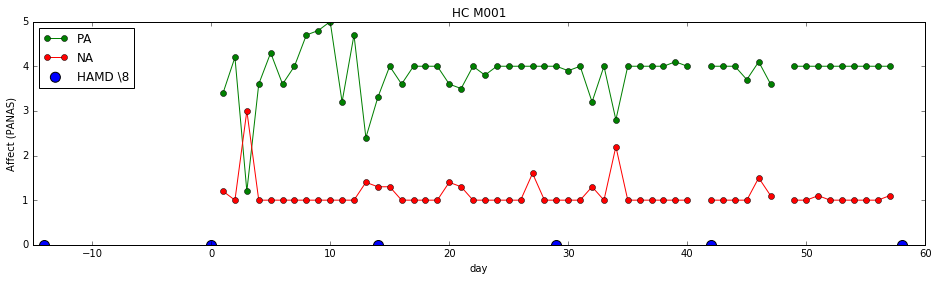

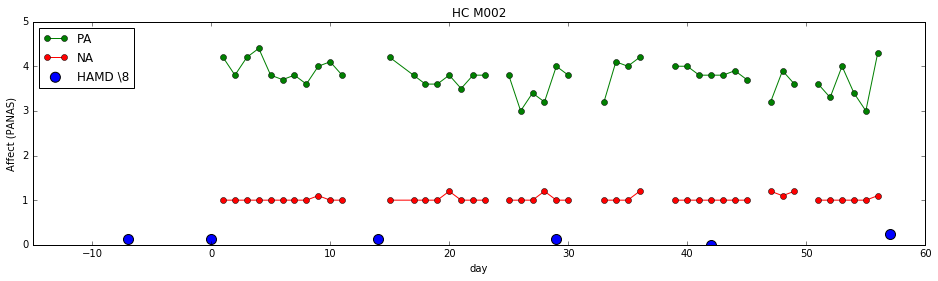

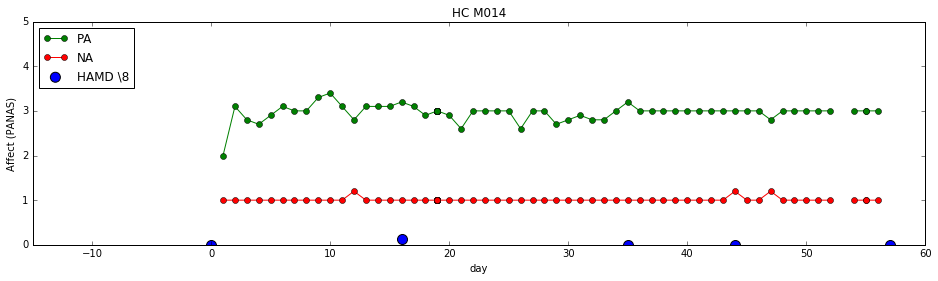

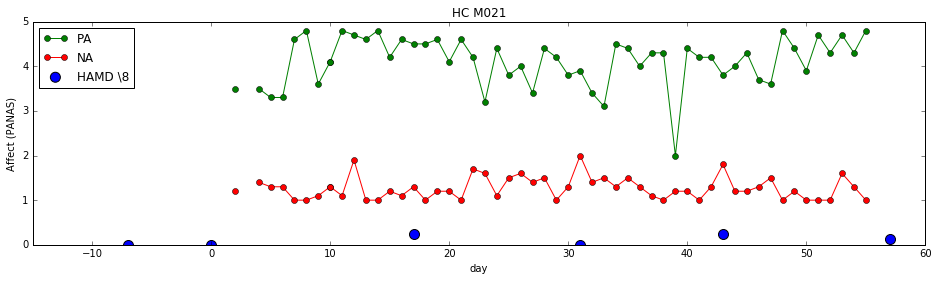

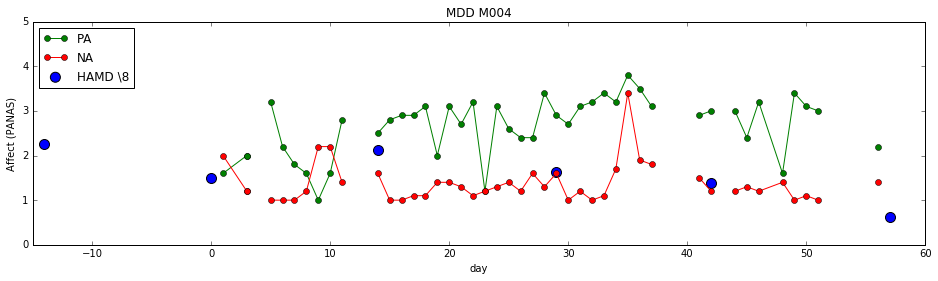

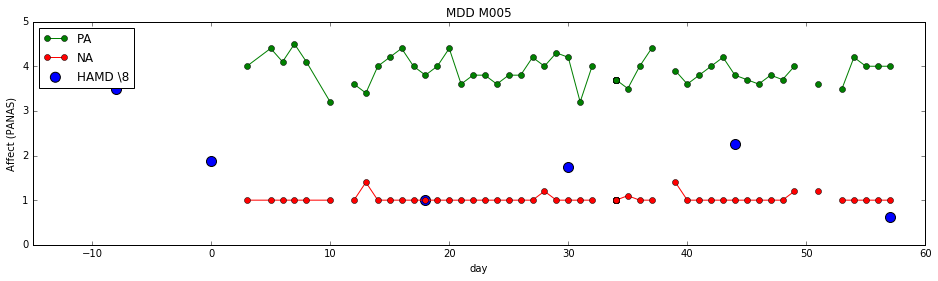

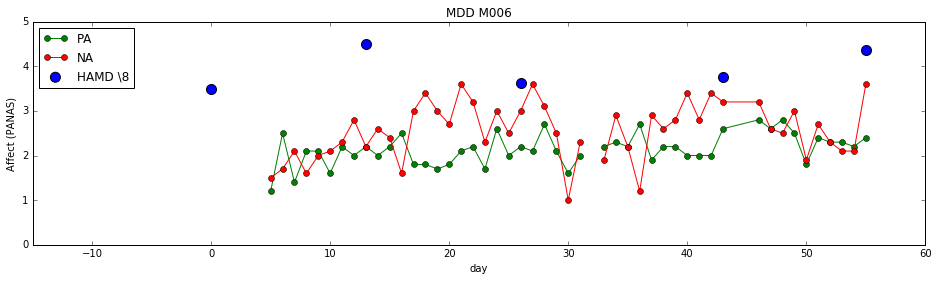

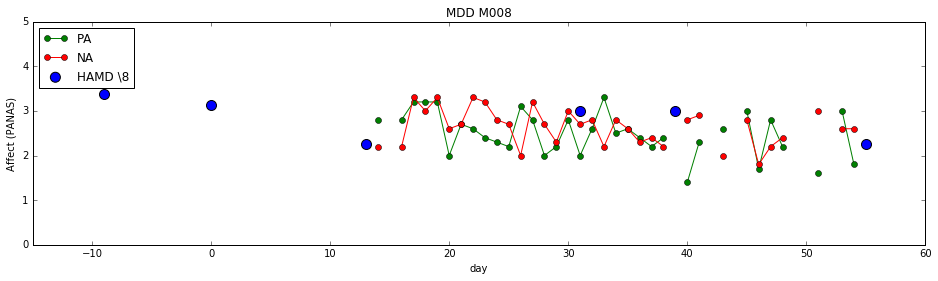

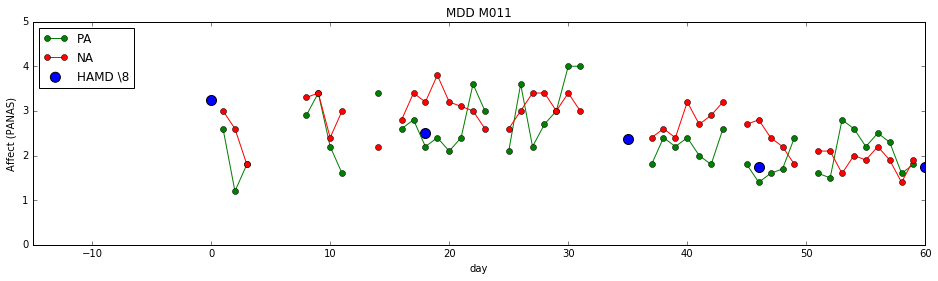

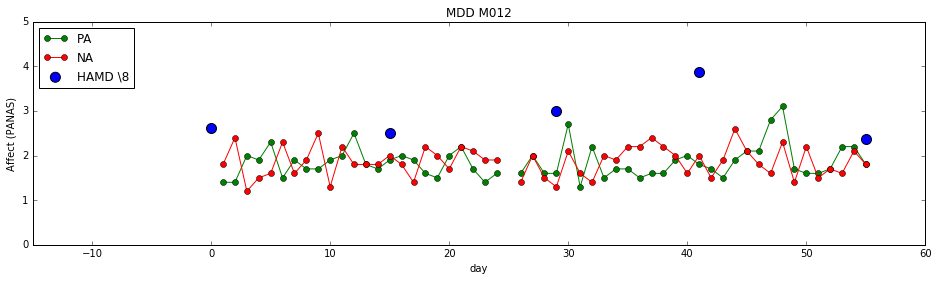

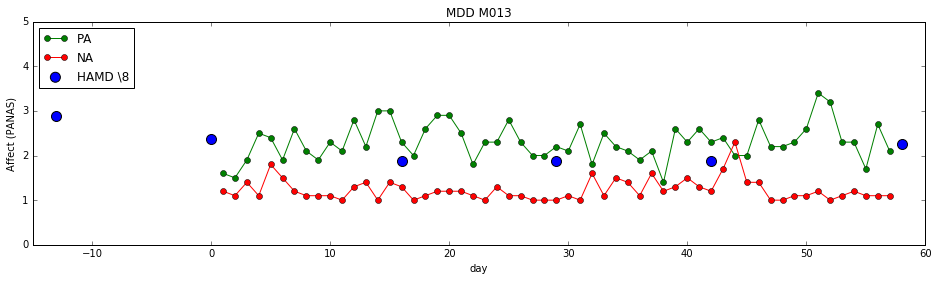

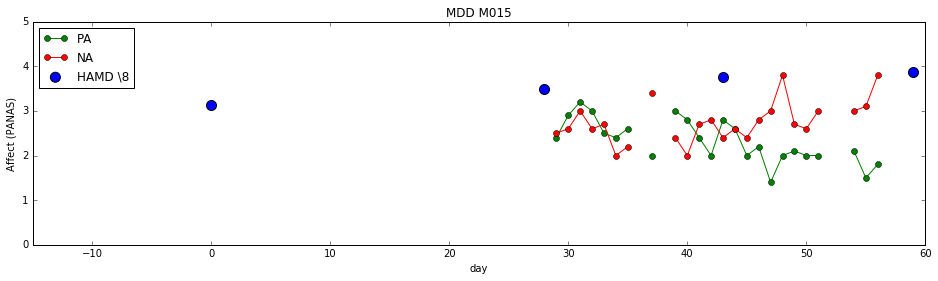

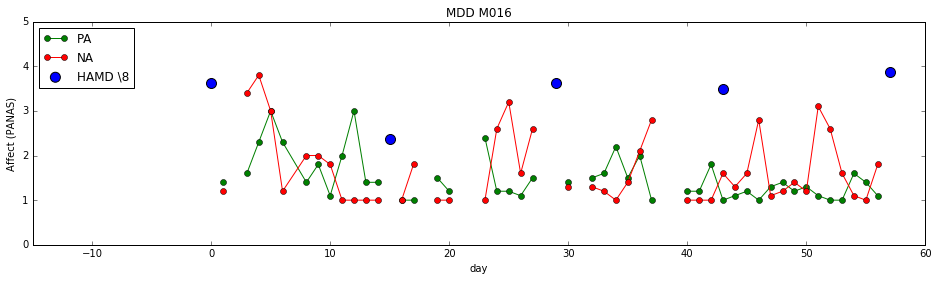

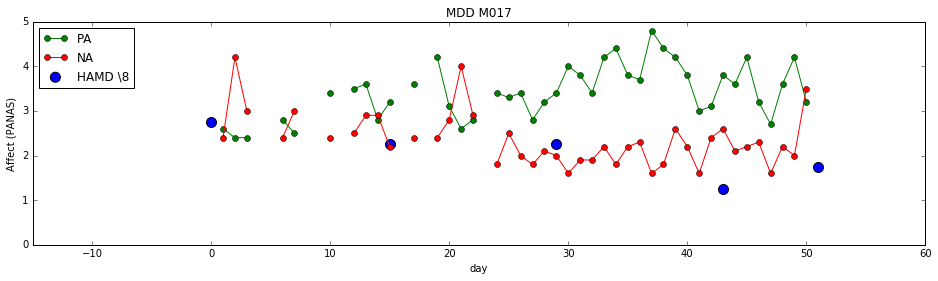

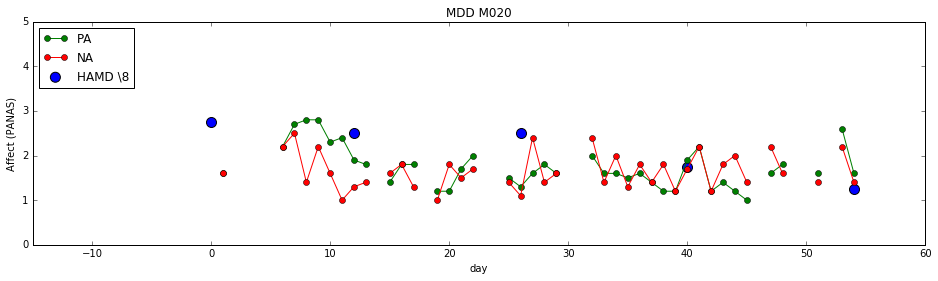

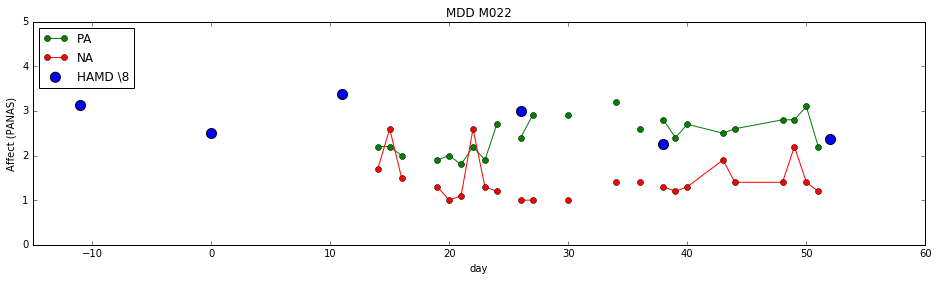

In [78]:
def plot_time_series(df):
    plt.figure(figsize=(16,4))
    plt.plot(df['day'], df['total_PA'], 'go-', label='PA')
    plt.plot(df['day'], df['total_NA'], 'ro-', label='NA')
    plt.scatter(df['day'], df['HAMD']/8.0, s=100, label='HAMD \8')
    
    plt.title(df['group'].iloc[0] + ' ' + df['ID'].iloc[0])
    plt.ylabel('Affect (PANAS)')
    plt.xlabel('day')
    plt.xlim([-15, 60])
    plt.ylim([0, 5])
    plt.legend(loc=2, scatterpoints=1)
    plt.show()
    
for user in HC:
    user_df = HAMD[HAMD['ID'] == user]
    plot_time_series(user_df)
    
for user in MDD:
    user_df = HAMD[HAMD['ID'] == user]
    plot_time_series(user_df)
    

#Dimensionality reduction

(628,)
(628, 2)
-42306.5822696
211001.755662
-81338.2911389
217024.427662


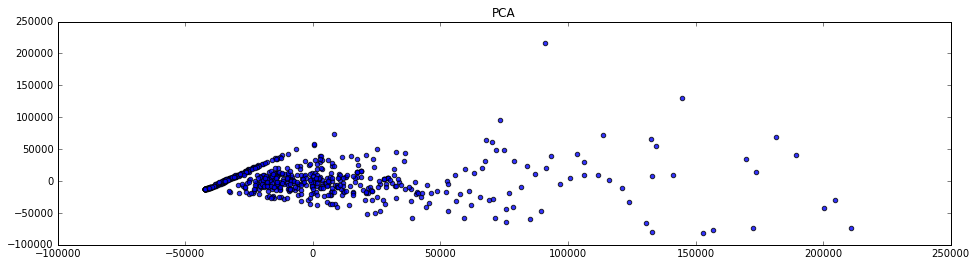

(628, 2)
-0.0300645080466
0.851371041344
-0.494064958555
0.780321164835


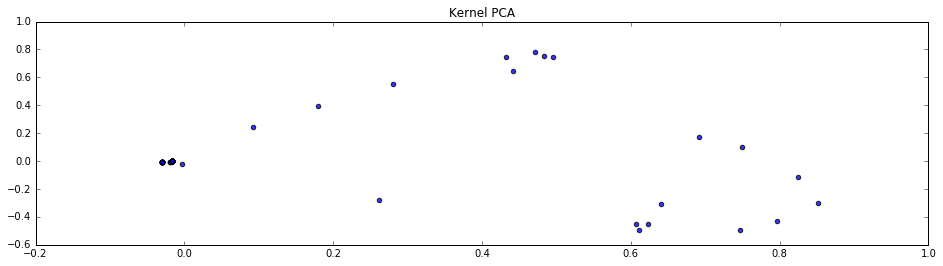

(628, 2)
-0.0127893619129
239814.475764
-107105.570897
196406.693894


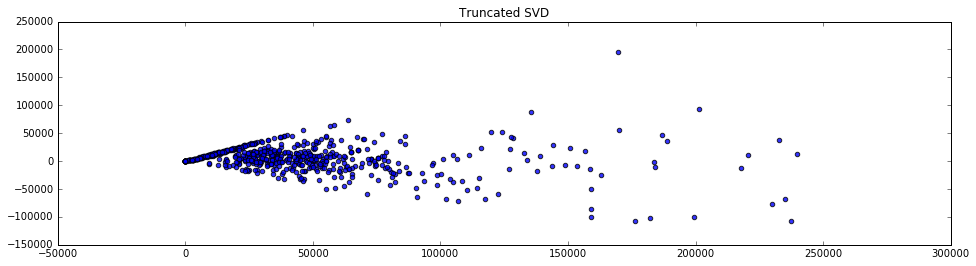

In [142]:
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD

df = HAMD[HAMD['group']=='MDD']
df = df.fillna(0)
df = df.reset_index(drop = True)
y_df = df[['ID', 'HAMD']]
x_df = df.drop(['date','Name','PSS','group', 
                'morning_trigger_time','beverages_trigger_time','medication_trigger_time',
                'feeling1_trigger_time','feeling2_trigger_time','evening_trigger_time',
               'morning_missing', 'beverages_missing', 'medication_missing',
               'feeling1_missing','feeling2_missing','evening_missing',
               'sleepMed', 'anxietyMed', 'painMed' ,'otherMed',
               'beerT', 'wineT' ,'spiritsT', 'ciderT', 'coffeeT', 'teaT', 'sodaT', 'energyT',
               'sleepLog', 'ID'], inplace=False, axis=1)

y = np.array(y_df['HAMD'])
x = np.array(x_df)

def plot_PCA(x, ttl):
    print np.shape(x)
    print np.min(x[:,0])
    print np.max(x[:,0])
    print np.min(x[:,1])
    print np.max(x[:,1])
    #from mpl_toolkits.mplot3d import Axes3D
    plt.figure(figsize=(16,4))
    #ax = fig.add_subplot(111, projection='3d')
    plt.scatter(x[:,0], x[:,1], label=user, alpha=0.8, s=20)
    #ax.scatter(x[:,0], x[:,1], x[:,2], label=user, alpha=0.8, s=10)
    # plt.scatter(x, y, label=user, alpha=0.8, s=100)
    # plt.ylim(0,40)
    plt.title(ttl)
    plt.show()

pca = PCA(n_components=2)
x1 = pca.fit_transform(x)

kernel_pca = KernelPCA(n_components=2, kernel='rbf')
x2 = kernel_pca.fit_transform(x)

truncated_svd = TruncatedSVD(n_components=2)
x3 = truncated_svd.fit_transform(x)


print np.shape(y)
plot_PCA(x1, 'PCA')
plot_PCA(x2, 'Kernel PCA')
plot_PCA(x3, 'Truncated SVD')

#Regression: estimating HAMD from PA and NA, missing data

####DONE personalization: one-hot representation of the user
####TODO regression with interaction terms (if data for PA/NA exists * value)
####DONE regression on train and report accuracy on test
####TODO select between: PA/NA, PA/NA+one-hot user, all survey data, reduced survey data with PCA etc.

#### model selection:
linear regression, polynomial regression, stepwise regression (forward, backward), ridge regression, lasso regression, ElasticNet regression


[[ -5.81370862e+00   1.03548036e+01   1.72758800e+00   3.62843326e+00
   -3.32813492e+00  -1.86138807e+01  -4.79166592e+00   1.72751434e+01
    1.05586168e+01  -3.35502008e+00   5.32907052e-15  -1.42108547e-14
    8.43769499e-15  -1.24344979e-14  -7.82314655e+00   3.99236462e+00
    1.56676883e+01  -8.88178420e-15  -6.66217757e+00   0.00000000e+00
    0.00000000e+00  -1.62195560e+01  -3.88703315e+00  -2.00789528e+00
    0.00000000e+00   1.05213869e+01   1.36837666e+01  -6.04082714e+00
    0.00000000e+00   0.00000000e+00  -4.23970378e+00   0.00000000e+00
    3.01513309e+00]]

66.2500207478


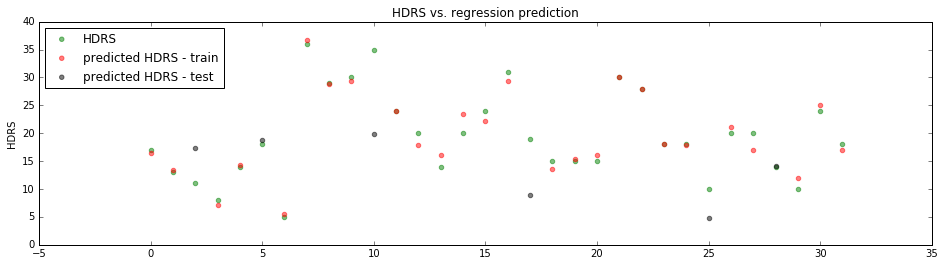

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error

USER_N = 23
np.random.seed(10)

input_df = HAMD[HAMD['group']=='MDD']

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(USER_N))


def one_hot_id(series):
    b = label_binarizer.transform([int(series['ID'][1:])])
    series['ID_one_hot'] = b[0]
    series['has_PANAS'] = [int(not np.isnan(series['total_PA1'])), int(not np.isnan(series['total_PA2']))]
    return series

df = input_df[input_df['HAMD'] >= 0]
df = df[df['total_PA'] >= 0]
df = df[df['total_NA'] >= 0]
df['NA/PA'] = df['total_NA']/df['total_PA']

df = df.apply(one_hot_id, axis=1)
# df = df.dropna()
df = df.fillna(0)
df = df.reset_index(drop = True)

# Create linear regression object
regr = linear_model.LinearRegression()

def create_PANAS_detailed_one_hot_missing():
    x1 = np.array(df[['total_PA1', 'total_NA1', 'total_PA2', 'total_NA2', 'total_PA', 'total_NA', 'avg_weekly_PA', 'avg_weekly_NA', 'weighted_avg_weekly_PA', 'weighted_avg_weekly_NA']])
    tmp_x2 = np.array(df[['ID_one_hot']])
    x2 = np.squeeze(np.array([list(row) for row in tmp_x2]))
    tmp_x3 = np.array(df[['has_PANAS']])
    x3 = np.squeeze(np.array([list(row) for row in tmp_x3]))
    x = np.hstack((x1, x2, x3))
    return x

def create_PANAS_detailed_one_hot():
    x1 = np.array(df[['total_PA1', 'total_NA1', 'total_PA2', 'total_NA2', 'total_PA', 'total_NA', 'avg_weekly_PA', 'avg_weekly_NA', 'weighted_avg_weekly_PA', 'weighted_avg_weekly_NA']])
    tmp_x2 = np.array(df[['ID_one_hot']])
    x2 = np.squeeze(np.array([list(row) for row in tmp_x2]))
    x = np.hstack((x1, x2))
    return x

def create_PANAS_overall_one_hot():
    x1 = np.array(df[['total_PA', 'total_NA', 'avg_weekly_PA', 'avg_weekly_NA', 'weighted_avg_weekly_PA', 'weighted_avg_weekly_NA']])
    tmp_x2 = np.array(df[['ID_one_hot']])
    x2 = np.squeeze(np.array([list(row) for row in tmp_x2]))
    x = np.hstack((x1, x2))
    return x

def create_PANAS_overall():
    x1 = np.array(df[['total_PA', 'total_NA', 'avg_weekly_PA', 'avg_weekly_NA', 'weighted_avg_weekly_PA', 'weighted_avg_weekly_NA']])
    return x1

def create_PANAS_ratio():
    x1 = np.array(df[['NA/PA']])
    return x1

y = np.array(df['HAMD']).reshape(-1,1)
x = create_PANAS_detailed_one_hot()

def split_data(x, y):
    #not the first score, no two from the same person
    test_N = int(len(y)*0.2)
    train_N = len(y) - test_N
    ind_train = list(np.arange(len(y)))
    ind_test = [2, 5, 10, 17, 25, 28]
#     ind_test = [2]
    for ind in ind_test:
        ind_train.remove(ind)
#     inds = np.arange(len(y))
#     np.random.shuffle(inds)
#     ind_train = inds[test_N:]
#     ind_test = inds[0:test_N]
    x_train = x[ind_train]
    y_train = y[ind_train]
    x_test = x[ind_test]
    y_test = y[ind_test]
    return ind_train, x_train, y_train, ind_test, x_test, y_test

ind_train, x_train, y_train, ind_test, x_test, y_test = split_data(x,y)

# Train the model using the training sets
regr.fit(x_train, y_train)

# print sklearn.feature_selection.f_regression(x, y, center=True)
print regr.coef_
print

# err = 1.0-5.0/4.0*(1-r2_score(y_test, regr.predict(x_test), multioutput='variance_weighted'))

print mean_squared_error(y_test, regr.predict(x_test))



plt.figure(figsize=(16,4))

plt.scatter(range(len(y)), y, label='HDRS', color = 'green', alpha=0.5)
plt.scatter(ind_train, regr.predict(x_train), label='predicted HDRS - train', color = 'red', alpha=0.5)
plt.scatter(ind_test, regr.predict(x_test), label='predicted HDRS - test', color = 'black', alpha=0.5)

plt.title('HDRS vs. regression prediction')
plt.ylabel('HDRS')

plt.legend(loc=2, scatterpoints=1)
plt.show()

In [71]:
from scipy import stats

def calc_correalation(PA, NA):
    print '\n' + NA + '/'+ PA
    cor_df = HAMD[HAMD['group']=='MDD']
    cor_df = cor_df.dropna(subset=[PA, NA, 'HAMD']).reset_index()
    cor_df = cor_df.reset_index()
    print len(cor_df)

    print stats.pearsonr(cor_df[NA]/cor_df[PA], cor_df['HAMD'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(cor_df[NA]/cor_df[PA], cor_df['HAMD'])
    print 'p-value: ', p_value
    print 'slope: ', slope
    print 'intercept: ', intercept
    print 'r_value: ', r_value
    print 'std_err:', std_err
    
calc_correalation('total_PA', 'total_NA')
calc_correalation('avg_weekly_PA', 'avg_weekly_NA')
calc_correalation('weighted_avg_weekly_PA', 'weighted_avg_weekly_NA')


total_NA/total_PA
32
(0.53851027324997591, 0.0014750591205444361)
p-value:  0.00147505912054
slope:  9.51223369818
intercept:  11.5554713152
r_value:  0.53851027325
std_err: 2.71743466048

avg_weekly_NA/avg_weekly_PA
44
(0.70326411658572685, 1.0179426315598488e-07)
p-value:  1.01794263156e-07
slope:  14.0328413078
intercept:  7.51108300698
r_value:  0.703264116586
std_err: 2.18891321156

weighted_avg_weekly_NA/weighted_avg_weekly_PA
44
(0.61899943478905461, 7.4982745710055337e-06)
p-value:  7.49827457101e-06
slope:  11.6449232012
intercept:  9.64706226054
r_value:  0.618999434789
std_err: 2.27985848073


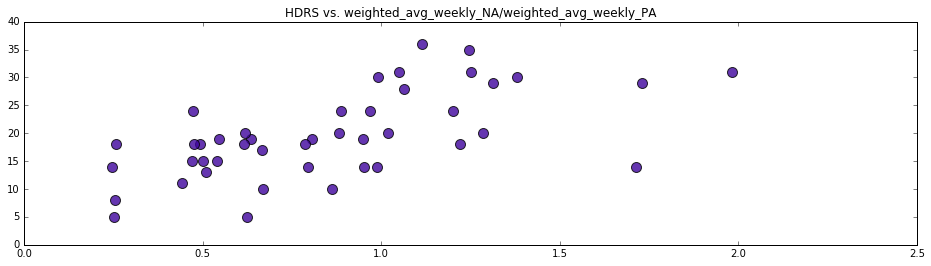

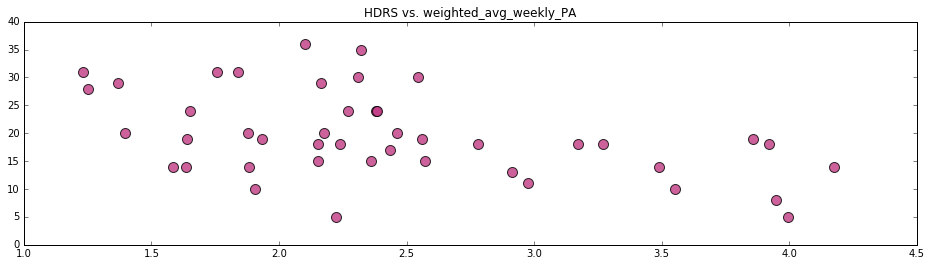

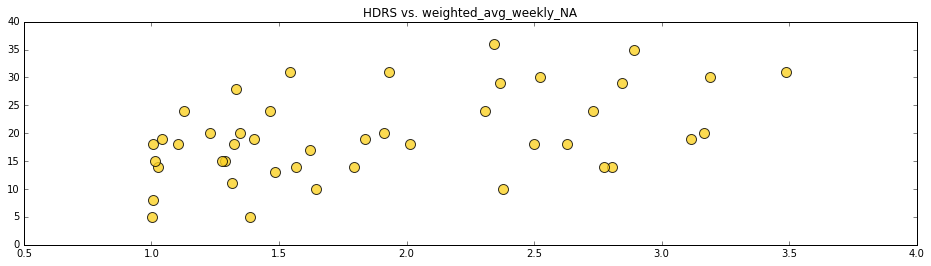

In [85]:
# plot HDRS vs affect for all

def plot_HDRS_vs_affect(PA, NA):
    cmap = matplotlib.cm.get_cmap('plasma') #Set3, 'viridis'

    MDD_HAMD = HAMD[HAMD['group']=='MDD']

    plt.figure(figsize=(16,4))
    my_color = cmap((1)/11.0)
    plt.scatter(MDD_HAMD[NA]/MDD_HAMD[PA], MDD_HAMD['HAMD'], label=user, alpha=0.8,  c=my_color,  s=100)
    plt.ylim(0,40)
    #     plt.xlim(1,5)
    plt.savefig('HDRS vs. ' + NA + '-' + PA+'.pdf', transparent=True, format='pdf', bbox_inches='tight')
    plt.title('HDRS vs. ' + NA + '/' + PA)
    plt.show()



    plt.figure(figsize=(16,4))
    my_color = cmap((5)/11.0)
    plt.scatter(MDD_HAMD[PA], MDD_HAMD['HAMD'], label=user, alpha=0.8,  c=my_color,  s=100)
    
    plt.ylim(0,40)
    #     plt.xlim(1,5)
    plt.savefig('HDRS vs. '+ PA+'.pdf', transparent=True, format='pdf', bbox_inches='tight')
    plt.title('HDRS vs. ' + PA)
    plt.show()

    plt.figure(figsize=(16,4))
    my_color = cmap((10)/11.0)
    plt.scatter(MDD_HAMD[NA], MDD_HAMD['HAMD'], label=user, alpha=0.8,  c=my_color,  s=100)
    
    plt.ylim(0,40)
    #     plt.xlim(1,5)
    plt.savefig('HDRS vs. '+ NA+'.pdf', transparent=True, format='pdf', bbox_inches='tight')
    plt.title('HDRS vs. ' + NA)
    plt.show()
    
# plot_HDRS_vs_affect('total_PA', 'total_NA')
# plot_HDRS_vs_affect('avg_weekly_PA', 'avg_weekly_NA')
plot_HDRS_vs_affect('weighted_avg_weekly_PA', 'weighted_avg_weekly_NA')

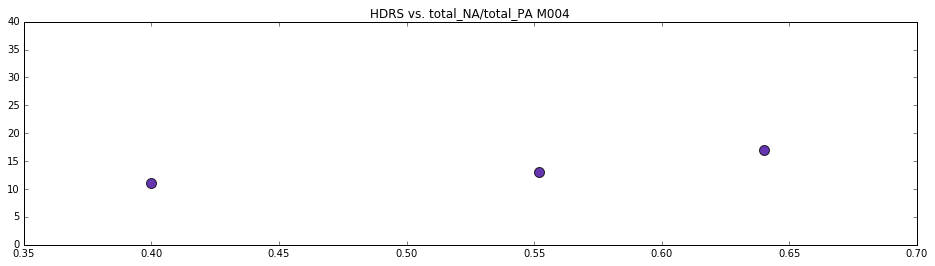

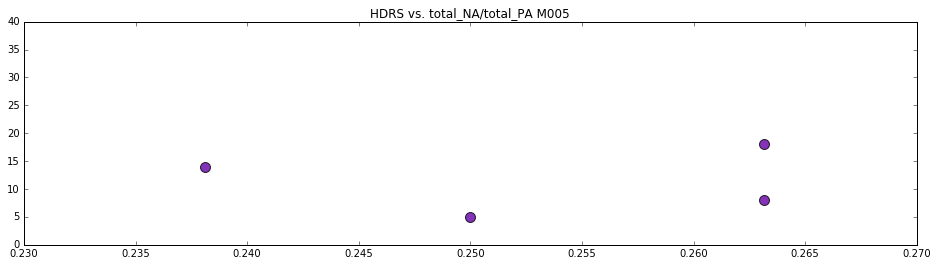

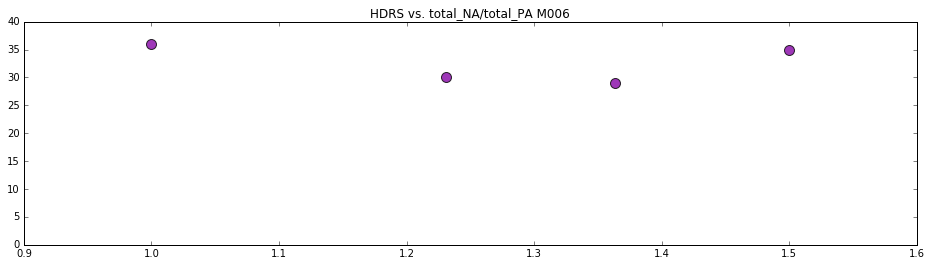

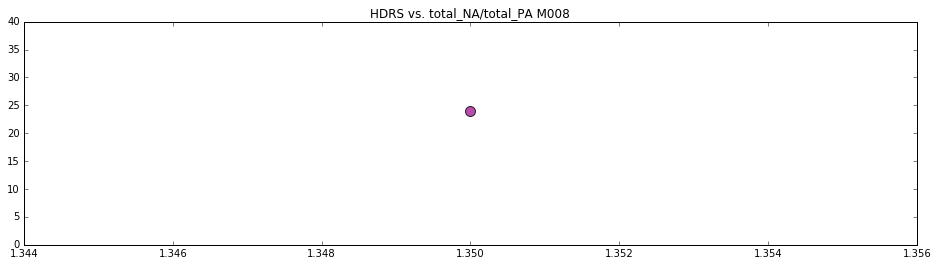

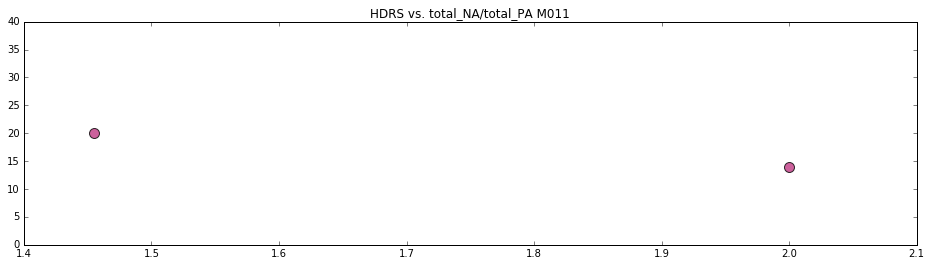

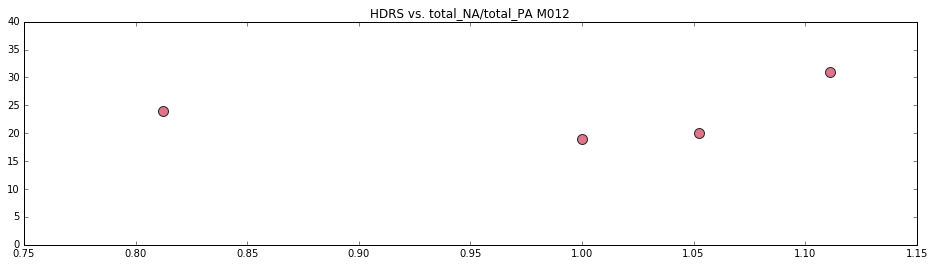

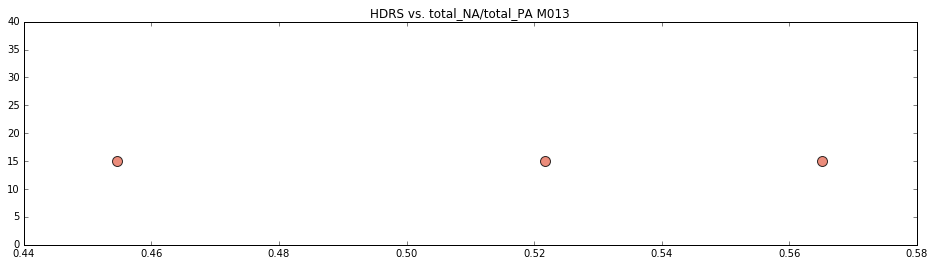

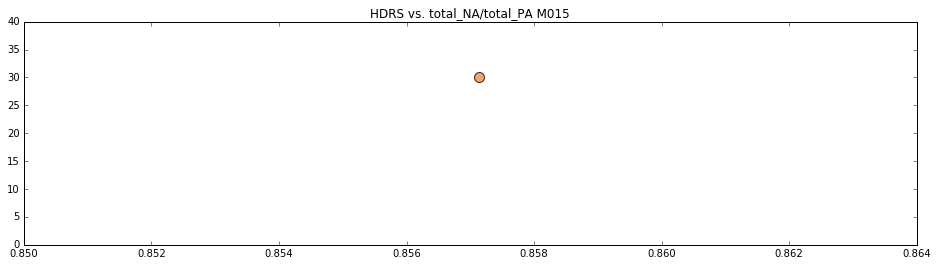

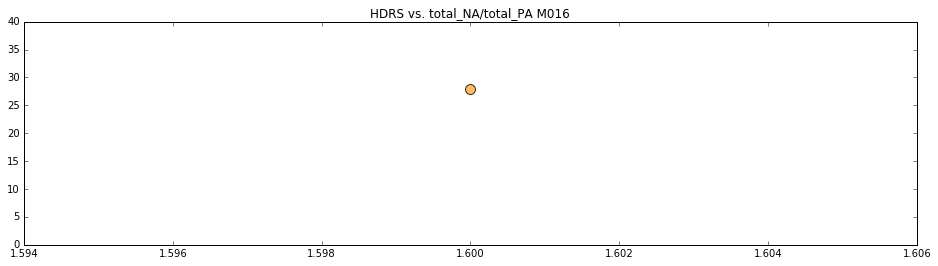

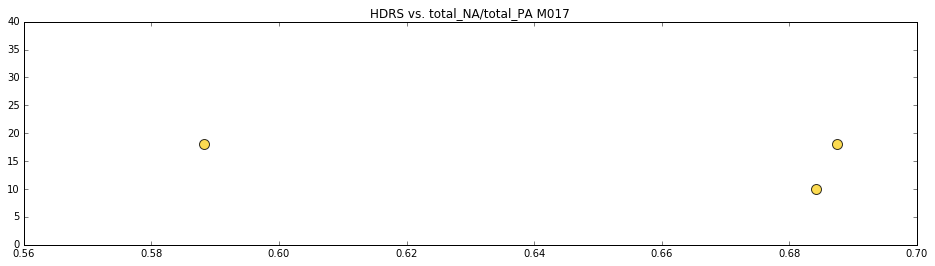

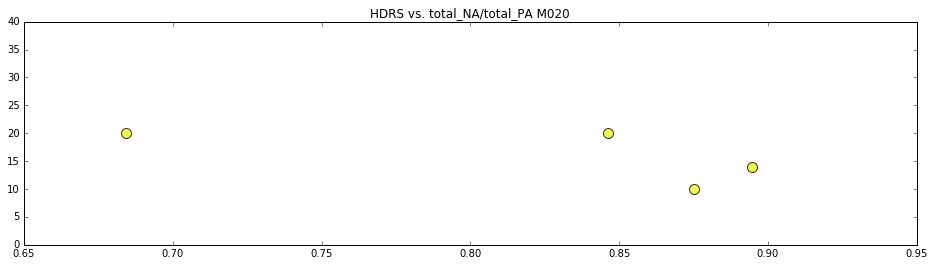

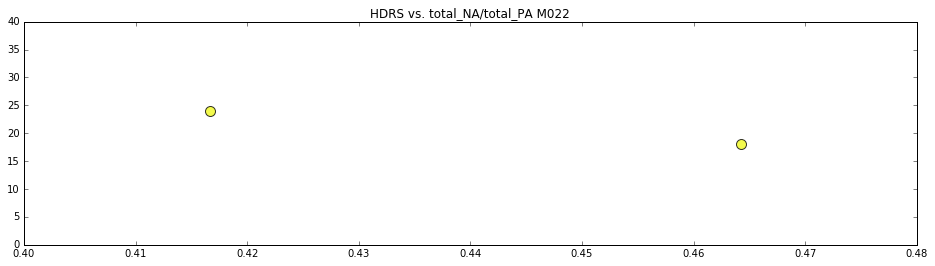

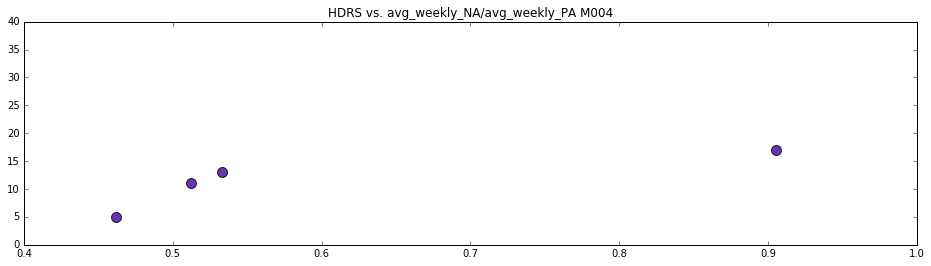

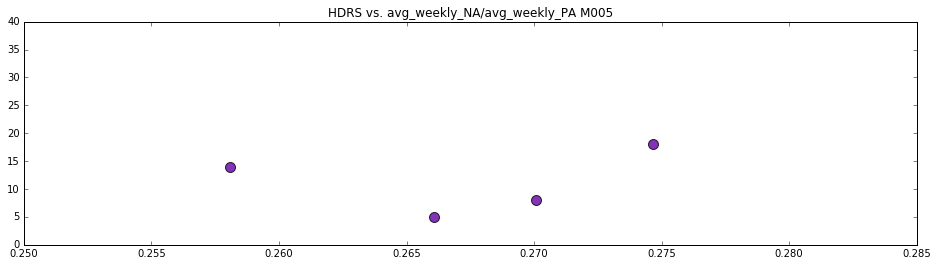

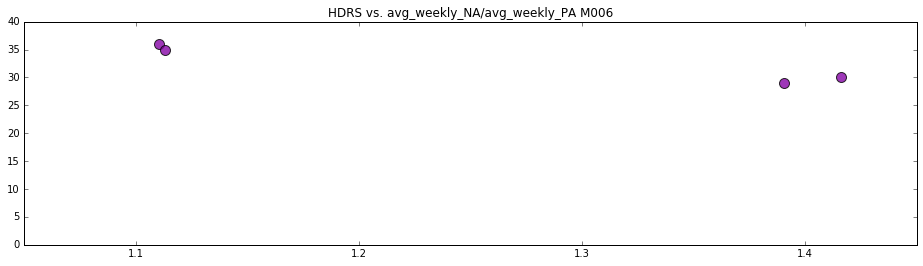

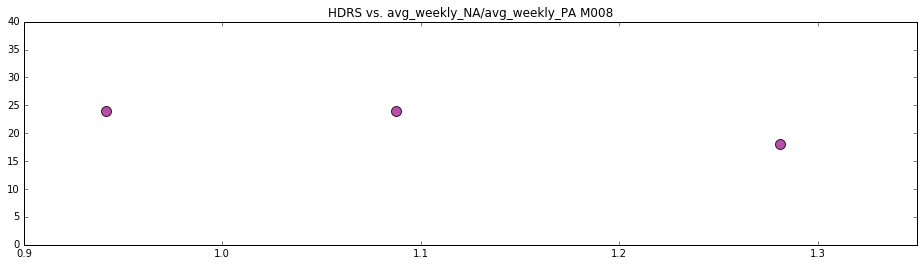

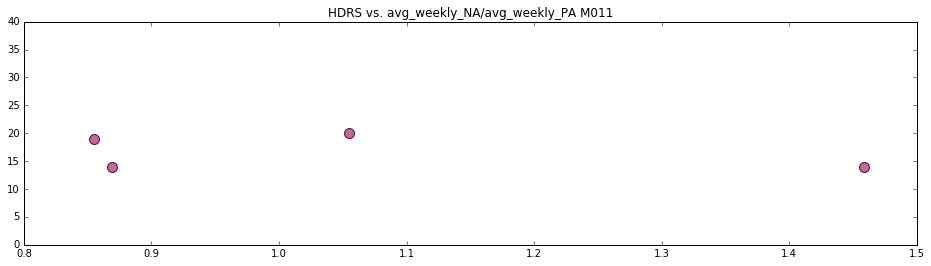

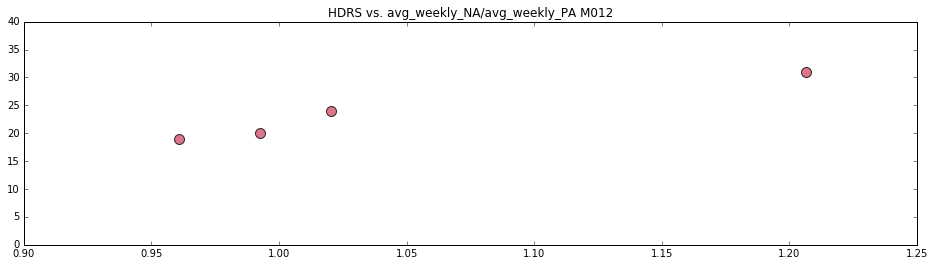

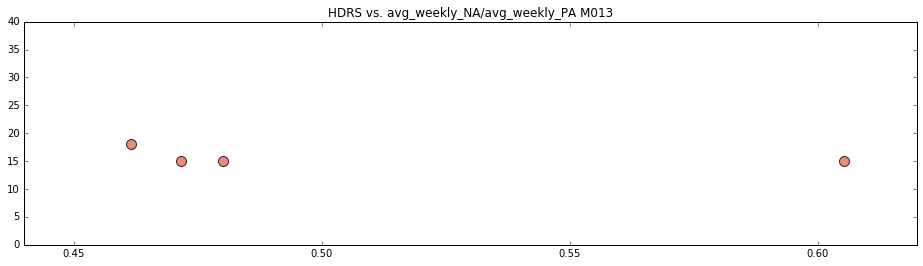

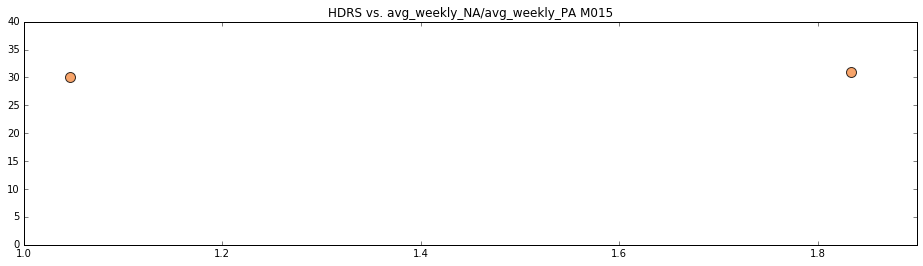

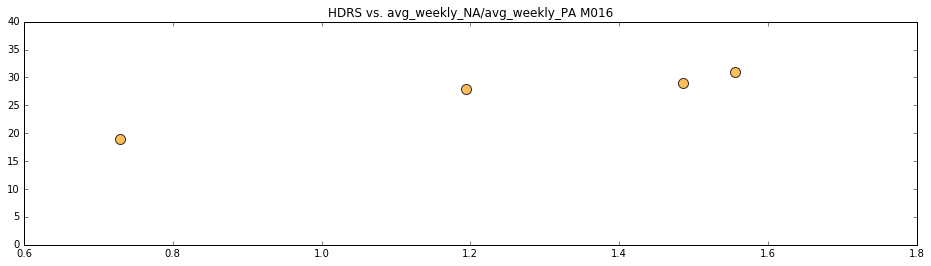

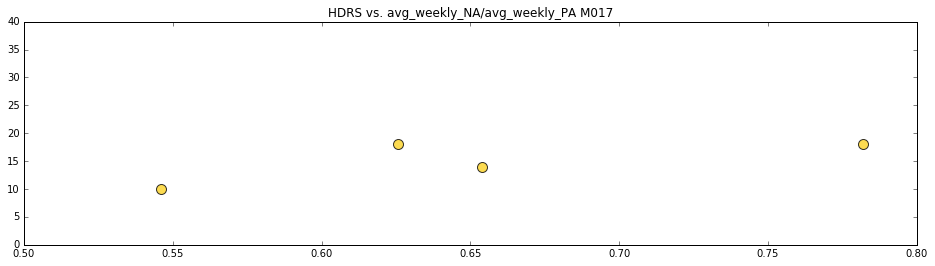

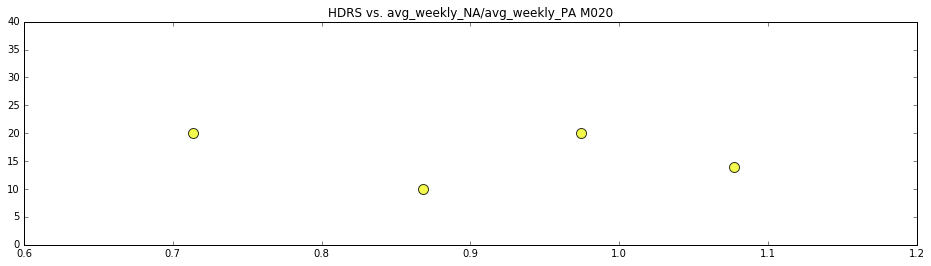

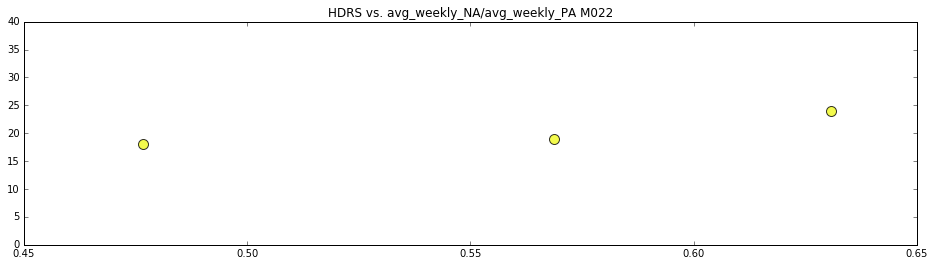

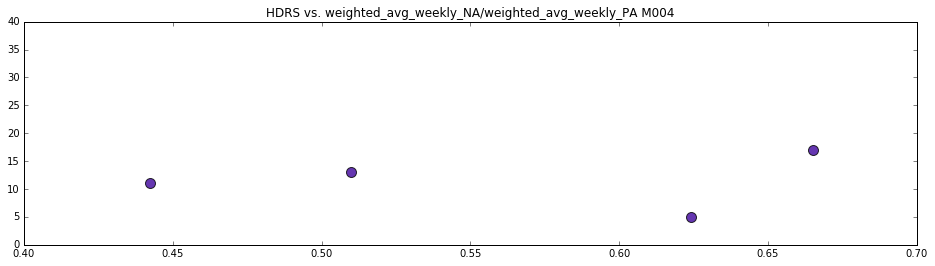

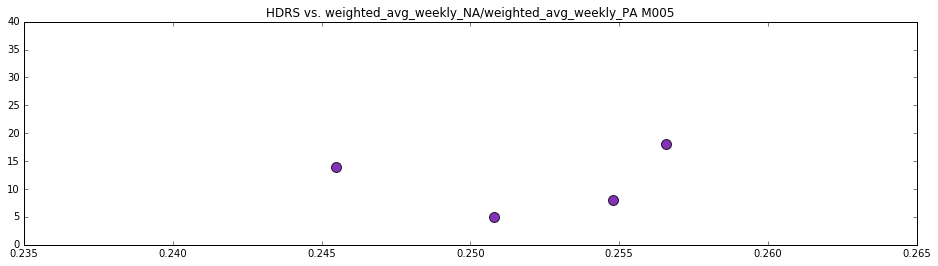

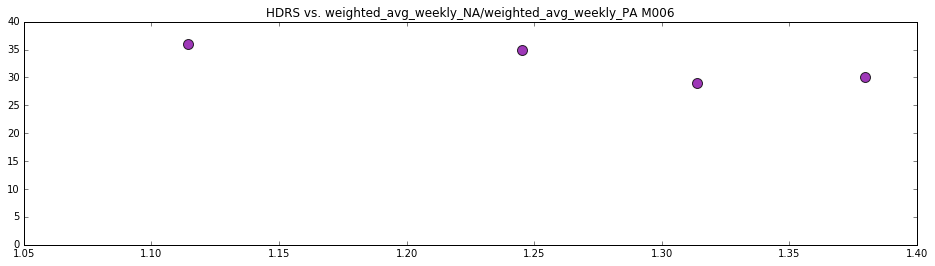

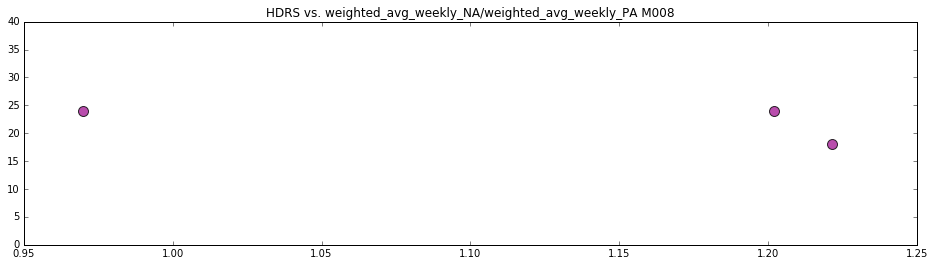

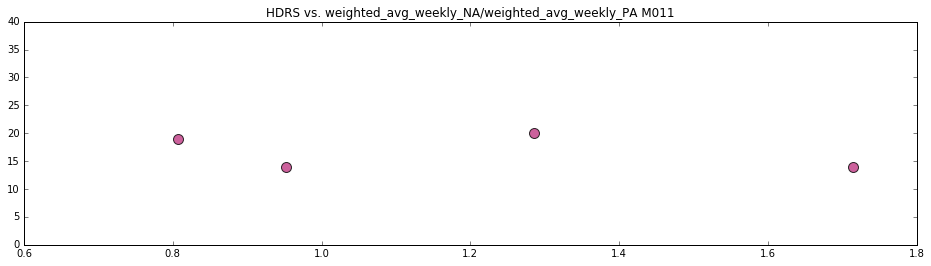

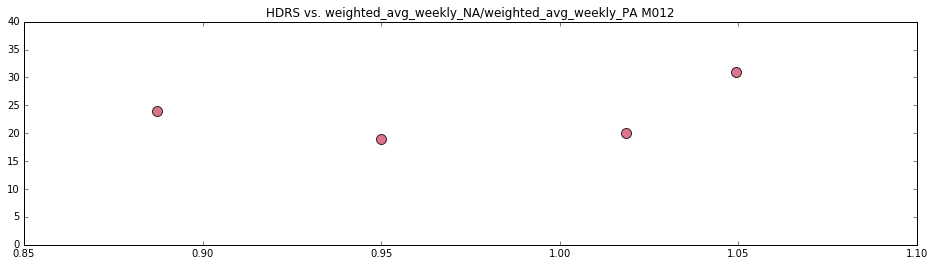

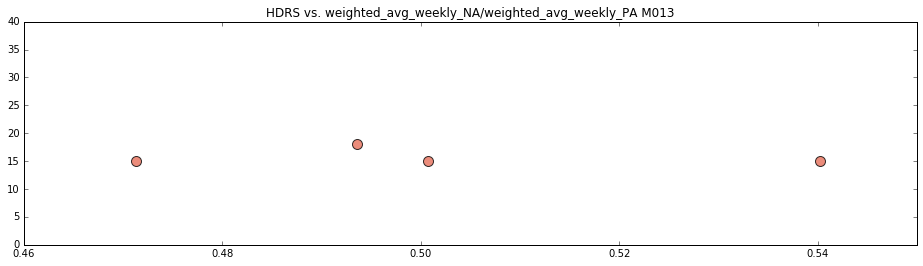

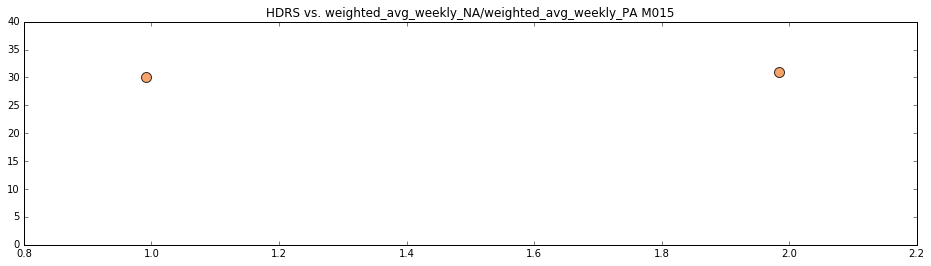

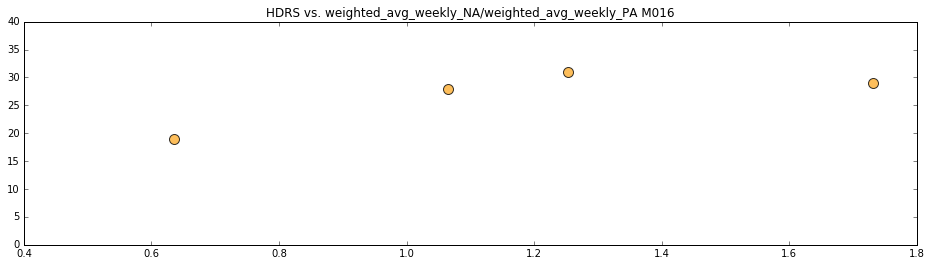

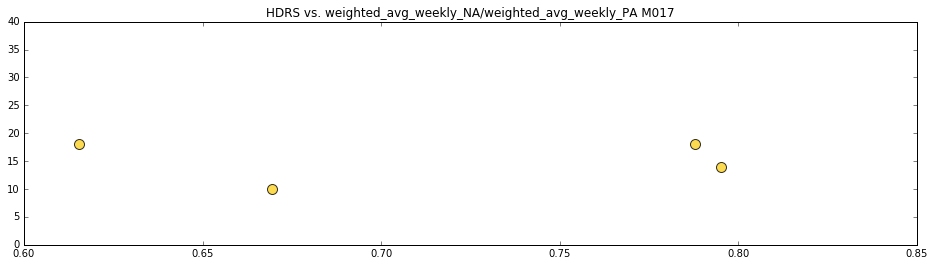

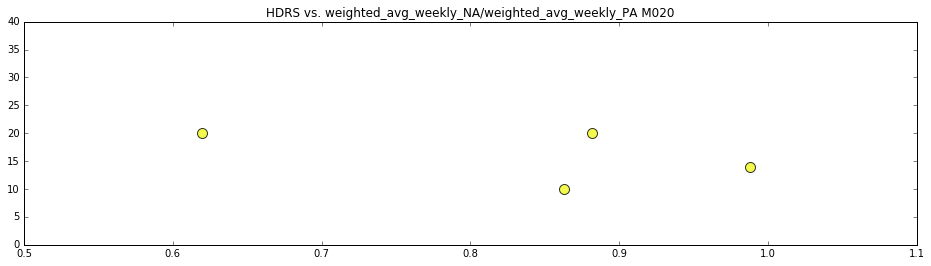

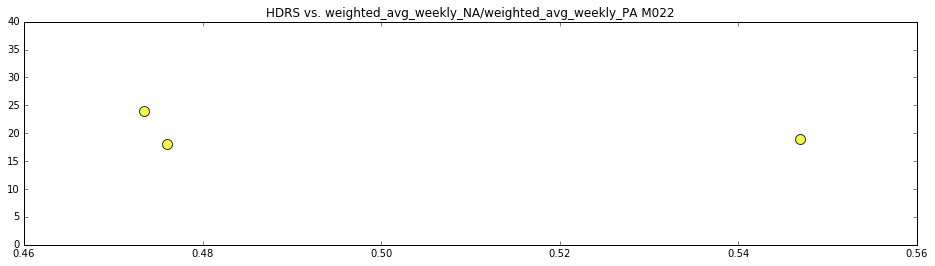

In [74]:
# plot HDRS vs affect per user

def plot_user_HDRS_vs_affect(PA, NA):
    cmap = matplotlib.cm.get_cmap('plasma') #Set3, 'viridis'

    MDD_HAMD = HAMD[HAMD['group']=='MDD']

    user_ind = 0
    for user in MDD:
        plt.figure(figsize=(16,4))
        my_color = cmap((user_ind+1)/11.0)
        user_df = MDD_HAMD[MDD_HAMD['ID']==user]
        plt.scatter(user_df[NA]/user_df[PA], user_df['HAMD'], label=user, alpha=0.8,  c=my_color,  s=100)
        plt.title('HDRS vs. ' + NA + '/' + PA + ' ' + user)
        plt.ylim(0,40)
    #     plt.xlim(1,5)
        user_ind +=1
        plt.show()
        
plot_user_HDRS_vs_affect('total_PA', 'total_NA')
plot_user_HDRS_vs_affect('avg_weekly_PA', 'avg_weekly_NA')
plot_user_HDRS_vs_affect('weighted_avg_weekly_PA', 'weighted_avg_weekly_NA')

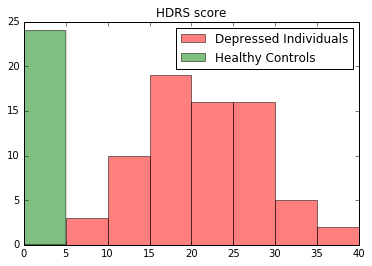

In [84]:
MDD_HAMD = HAMD[HAMD['group']=='MDD']
HC_HAMD = HAMD[HAMD['group']=='HC']

bs = range(0,45,5)
plt.hist(MDD_HAMD['HAMD'].dropna(axis=0), bins=bs, alpha=0.5, label='Depressed Individuals', normed=False, color='r')
plt.hist(HC_HAMD['HAMD'].dropna(axis=0), bins=bs, alpha=0.5, label='Healthy Controls', normed=False, color='g')
plt.title('HDRS score')
plt.legend()
plt.savefig('HDRS.pdf', transparent=True, format='pdf', bbox_inches='tight')
plt.show()
    
# bins = np.arange(0.54, 0.76, 0.025)
# print bins

# plt.figure(figsize=(8,5))
# plt.hist(sri_HC['obj_sleep_reg_index'], bins, alpha=0.5, label='Healthy Controls', normed=True, color='g')
# plt.hist(sri_MDD['obj_sleep_reg_index'], bins, alpha=0.5, label='Depressed Individuals', normed=True, color='r')
# plt.xlim([0.53,0.75])
# plt.ylim([0,25])
# plt.xlabel('Objective Sleep Regularity Index', fontsize = 20)
# plt.ylabel('Normalized % of Individuals', fontsize = 20)
# plt.title('Normalized Histogram of Objective Sleep Regularity Index\nfor Healthy vs. Depressed Individuals', fontsize = 20, y=1.08)
# plt.legend(loc='upper left', fontsize = 15)
# plt.show()

#Calculating the size of available datasets

In [16]:
MDD_HAMD = HAMD[HAMD['group']=='MDD']
MDD_HAMD = MDD_HAMD[MDD_HAMD['Name']!='Screen']

#data each 30 seconds
#0 awake, 1 sleep, -1 missing
#count objective data


def count_obj_sleep(ID):
    
    file_path=sensor_data_dir+ID+'_sleep_pattern_right.h5'
    with pd.HDFStore(file_path) as hdf:
        night_dates = hdf.keys()
        
    STEP=1.0/(60.0*2.0)
#     print ID
#     print len(night_dates)
#     print
    
    
    for idx, night in enumerate(night_dates):
        #for all elements except the last one
        # extract date string from the key
        date_str = night.split('_')[1]
        df_night = pd.read_hdf(file_path, key=night)
        obj_slp=np.array(df_night['z'])
    return len(night_dates)

E4_dataset_size = 0
for i in MDD:
    E4_dataset_size += count_obj_sleep(i)
    
print 'E4 dataset size: ' + str(E4_dataset_size)

print 'clinical measures dataset size: ' + str(len(MDD_HAMD[MDD_HAMD['HAMD']>=0]))
print 'daily surveys dataset size: ' + str(len(MDD_HAMD[MDD_HAMD['NA']>=0])) #same as PA


E4 dataset size: 540
clinical measures dataset size: 59
daily surveys dataset size: 503


####Feature generation
####Dimensionality reduction
####Imputing HDRS from survey data
####Predicting HDRS from survey data
####Evaluation

#Legacy

In [2]:
def create_survey_dataset(group, ID):
    CUTOFF_MS=1000
    df = pd.read_csv(input_dir+ID+'.csv')
    df = df [df['Missing'] != 'Ignored']
    df = df [df['Missing'] != 'Incomplete']
    df['ID'] = ID
    df['group'] = group
    def calc_total_affect_score(series):
#         series['valid'] = series['emotionsTime1']>CUTOFF_MS or series['emotionsTime2']>CUTOFF_MS
        series['total_PA1'] = (series['interested'] + series['excited'] + series['strong'] + series['enthusiastic'] + series['proud'])/5.0
        series['total_NA1'] = (series['distressed'] + series['upset'] + series['guilty'] +series['scared'] + series['hostile'])/5.0
        series['total_PA2'] = (series['alert'] + series['inspired'] + series['determined'] + series['attentive'] +  series['active'])/5.0
        series['total_NA2'] = (series['irritable'] + series['ashamed'] + series['nervous'] + series['jittery'] + series['afraid'])/5.0
        series['total_PA'] = np.nanmean([series['total_PA1'], series['total_PA2']])
        series['total_NA'] = np.nanmean([series['total_NA1'], series['total_NA2']])
        return series

    df = df.apply(calc_total_affect_score, axis=1)
#     df = df[df['valid']==True]
    return df


survey_df = pd.DataFrame()


for user in HC:
    user_df = create_survey_dataset('HC', user)
    survey_df = pd.concat([survey_df, user_df])
    
for user in MDD:
    user_df = create_survey_dataset('MDD', user)
    survey_df = pd.concat([survey_df, user_df])
    
survey_df = survey_df.reset_index(drop = True)
survey_df.drop(['Participant','Trigger', 'Trigger_counter', 'audio',  'emotionsTime1-2', 'emotionsTime2-2', 
                'active2', 'afraid2', 'attentive2', 'determined2', 'enthusiastic2', 'guilty2', 'hostile2', 'jittery2', 'proud2', 'scared2',
               'beerImage', 'ciderImage', 'coffeePic', 'energyPic', 'sodaPic', 'spiritsImage', 'teaPic', 'wineImage',
                'thankQuote', 'passcode_1', 'passcode_2', 'passcode_3', 'passcode_4',
               'passcode_text', 'passcode_wrong_text',  'settings_save_text'], inplace=True, axis=1)

survey_df

/Users/asma/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


,Trigger_date,Trigger_time,Form,Form_start_date,Form_start_time,Form_finish_date,Form_finish_time,Form_upload_date,Form_upload_time,Missing,...,weeklyMeditationTime,weeklyMeditation,ID,group,total_PA1,total_NA1,total_PA2,total_NA2,total_PA,total_NA
0,2016-05-10,15:56:40,Settings,2016-05-10,15:56:40,2016-05-10,15:57:24,2016-05-10,21:57:23,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-05-10,21:00:00,Evening,2016-05-10,21:00:36,2016-05-10,21:01:23,2016-05-11,06:00:00,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-05-11,10:00:00,Morning,2016-05-11,10:00:10,2016-05-11,10:01:35,2016-05-14,01:22:10,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-05-11,10:00:00,Beverages,2016-05-11,10:01:36,2016-05-11,10:01:42,2016-05-14,01:22:10,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-05-11,10:00:00,Medication,2016-05-11,10:01:43,2016-05-11,10:01:45,2016-05-14,01:22:11,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-05-11,16:36:39,Feeling2,2016-05-11,16:36:56,2016-05-11,16:37:19,2016-05-14,01:22:11,NaN,...,NaN,NaN,M001,HC,NaN,NaN,3.4,1.2,3.4,1.2
6,2016-05-11,16:36:39,midday,2016-05-11,16:37:20,2016-05-11,16:37:38,2016-05-14,01:22:12,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-05-11,21:01:39,Evening,2016-05-11,21:11:53,2016-05-11,21:12:35,2016-05-14,01:22:12,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-05-12,10:01:39,Morning,2016-05-12,10:01:47,2016-05-12,10:02:22,2016-05-14,01:22:12,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-05-12,10:01:39,Beverages,2016-05-12,10:02:23,2016-05-12,10:02:25,2016-05-14,01:22:13,NaN,...,NaN,NaN,M001,HC,NaN,NaN,NaN,NaN,NaN,NaN


#Create PANAS dataset

In [8]:
def create_PANAS_dataset(group, ID):
    CUTOFF_MS=1000
    df = pd.read_csv(input_dir+ID+'.csv')
    df = df [df['Missing'] != 'Ignored']
    df = df [df['Missing'] != 'Incomplete']
    df = df [['Form_start_date', 'emotionsTime1', 'emotionsTime2', 'interested', 'distressed', 'excited', 'upset', 'guilty', 'strong', 'scared', 'hostile',
              'enthusiastic', 'proud', 'irritable', 'alert', 'ashamed', 'inspired', 'nervous', 'determined', 'attentive',
              'jittery', 'active', 'afraid']]
    df['ID'] = ID
    df['group'] = group
    def calc_total_affect_score(series):
        series['valid'] = series['emotionsTime1']>CUTOFF_MS or series['emotionsTime2']>CUTOFF_MS
        series['total_PA1'] = (series['interested'] + series['excited'] + series['strong'] + series['enthusiastic'] + series['proud'])/5.0
        series['total_NA1'] = (series['distressed'] + series['upset'] + series['guilty'] +series['scared'] + series['hostile'])/5.0
        series['total_PA2'] = (series['alert'] + series['inspired'] + series['determined'] + series['attentive'] +  series['active'])/5.0
        series['total_NA2'] = (series['irritable'] + series['ashamed'] + series['nervous'] + series['jittery'] + series['afraid'])/5.0
        return series

    df = df.apply(calc_total_affect_score, axis=1)
    df = df[df['valid']==True]
    return df[['group', 'ID', 'Form_start_date', 'emotionsTime1', 'emotionsTime2', 'interested', 'distressed', 'excited', 'upset', 'guilty', 'strong', 'scared', 'hostile',
              'enthusiastic', 'proud', 'irritable', 'alert', 'ashamed', 'inspired', 'nervous', 'determined', 'attentive',
              'jittery', 'active', 'afraid', 'total_PA1', 'total_NA1', 'total_PA2', 'total_NA2']]


all_df = pd.DataFrame(index=[], columns=['group', 'ID', 'Form_start_date', 'emotionsTime1', 'emotionsTime2', 'interested', 'distressed', 'excited', 'upset', 'guilty', 'strong', 'scared', 'hostile',
              'enthusiastic', 'proud', 'irritable', 'alert', 'ashamed', 'inspired', 'nervous', 'determined', 'attentive',
              'jittery', 'active', 'afraid', 'total_PA1', 'total_NA1', 'total_PA2', 'total_NA2'])


for user in HC:
    user_df = create_PANAS_dataset('HC', user)
    all_df = pd.concat([all_df, user_df])
    
for user in MDD:
    user_df = create_PANAS_dataset('MDD', user)
    all_df = pd.concat([all_df, user_df])
    
all_df=all_df.reset_index(drop = True)
all_df

,group,ID,Form_start_date,emotionsTime1,emotionsTime2,interested,distressed,excited,upset,guilty,...,nervous,determined,attentive,jittery,active,afraid,total_PA1,total_NA1,total_PA2,total_NA2
0,HC,M001,2016-05-11,NaN,23694,NaN,NaN,NaN,NaN,NaN,...,1,4,4,1,2,1,NaN,NaN,3.4,1.2
1,HC,M001,2016-05-12,17368,NaN,4,1,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1.0,NaN,NaN
2,HC,M001,2016-05-13,NaN,21249,NaN,NaN,NaN,NaN,NaN,...,3,1,2,4,1,1,NaN,NaN,1.2,3.0
3,HC,M001,2016-05-13,NaN,13068,NaN,NaN,NaN,NaN,NaN,...,1,4,4,1,3,1,NaN,NaN,3.8,1.0
4,HC,M001,2016-05-13,NaN,13679,NaN,NaN,NaN,NaN,NaN,...,1,3,4,1,3,1,NaN,NaN,3.6,1.0
5,HC,M001,2016-05-14,NaN,18110,NaN,NaN,NaN,NaN,NaN,...,1,3,4,1,3,1,NaN,NaN,3.4,1.0
6,HC,M001,2016-05-14,15105,NaN,4,1,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,3.8,1.0,NaN,NaN
7,HC,M001,2016-05-15,12249,NaN,4,1,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN
8,HC,M001,2016-05-15,NaN,13278,NaN,NaN,NaN,NaN,NaN,...,1,5,5,1,4,1,NaN,NaN,4.6,1.0
9,HC,M001,2016-05-16,NaN,7917,NaN,NaN,NaN,NaN,NaN,...,1,4,4,1,3,1,NaN,NaN,3.6,1.0


In [9]:
summary_df = all_df[['group', 'ID', 'Form_start_date', 'total_PA1', 'total_NA1', 'total_PA2', 'total_NA2']]
summary_df = summary_df.rename(columns={'Form_start_date': 'date'})
df_agg = summary_df.groupby(['group', 'ID', 'date'], as_index=False).mean()

def merge_affect_score(series):
    PAs = []
    NAs = []
    
    if not np.isnan(series['total_PA1']):
        PAs.append(series['total_PA1'])
    if not np.isnan(series['total_PA2']):
        PAs.append(series['total_PA2'])
        
    if not np.isnan(series['total_NA1']):
        NAs.append(series['total_NA1'])
    if not np.isnan(series['total_NA2']):
        NAs.append(series['total_NA2'])
        
    series['PA'] = np.mean(PAs)
    series['NA'] = np.mean(NAs)
    return series

df_agg = df_agg.apply(merge_affect_score, axis=1)


df_agg

,group,ID,date,total_PA1,total_NA1,total_PA2,total_NA2,PA,NA
0,HC,M001,2016-05-11,NaN,NaN,3.400000,1.200000,3.400000,1.200000
1,HC,M001,2016-05-12,4.200000,1.000000,NaN,NaN,4.200000,1.000000
2,HC,M001,2016-05-13,NaN,NaN,2.866667,1.666667,2.866667,1.666667
3,HC,M001,2016-05-14,3.800000,1.000000,3.400000,1.000000,3.600000,1.000000
4,HC,M001,2016-05-15,4.000000,1.000000,4.600000,1.000000,4.300000,1.000000
5,HC,M001,2016-05-16,NaN,NaN,3.333333,1.066667,3.333333,1.066667
6,HC,M001,2016-05-17,4.000000,1.000000,NaN,NaN,4.000000,1.000000
7,HC,M001,2016-05-18,4.500000,1.000000,4.400000,1.000000,4.450000,1.000000
8,HC,M001,2016-05-19,4.900000,1.000000,4.800000,1.000000,4.850000,1.000000
9,HC,M001,2016-05-20,5.000000,1.000000,NaN,NaN,5.000000,1.000000


In [10]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return ((d1 - d2).days)

HAMD = pd.read_csv('HAMD_final_scores.csv')


def update_date_format(series):
    series['date']=datetime.strptime(series['date'], '%m/%d/%y').strftime('%Y-%m-%d')
    return series

def calc_day(series):
    offset = HAMD[HAMD['ID']==series['ID']]
    offset = offset[offset['Name']=='Week 0']
    offset = offset['date'].iloc[0]
    series['day'] = days_between(series['date'], offset)
    if series['ID'] in HC:
        series['group'] = 'HC'
    elif series['ID'] in MDD:
        series['group'] = 'MDD'
    return series

HAMD = HAMD.apply(update_date_format, axis=1)
HAMD = HAMD[['ID','date','Name','HAMD', 'PSS']]

HAMD = HAMD.merge(df_agg, how='outer').reset_index(drop=True)
HAMD = HAMD.apply(calc_day, axis=1)
HAMD = HAMD.sort(['ID', 'day']).reset_index(drop=True)



for outlier in outliers:
    HAMD = HAMD[HAMD['ID'] != outlier] 
HAMD

,ID,date,Name,HAMD,PSS,group,total_PA1,total_NA1,total_PA2,total_NA2,PA,NA,day
0,M001,2016-04-26,Screen,0,1,HC,NaN,NaN,NaN,NaN,NaN,NaN,-14
1,M001,2016-05-10,Week 0,0,0,HC,NaN,NaN,NaN,NaN,NaN,NaN,0
2,M001,2016-05-11,NaN,NaN,NaN,HC,NaN,NaN,3.400000,1.200000,3.400000,1.200000,1
3,M001,2016-05-12,NaN,NaN,NaN,HC,4.200000,1.000000,NaN,NaN,4.200000,1.000000,2
4,M001,2016-05-13,NaN,NaN,NaN,HC,NaN,NaN,2.866667,1.666667,2.866667,1.666667,3
5,M001,2016-05-14,NaN,NaN,NaN,HC,3.800000,1.000000,3.400000,1.000000,3.600000,1.000000,4
6,M001,2016-05-15,NaN,NaN,NaN,HC,4.000000,1.000000,4.600000,1.000000,4.300000,1.000000,5
7,M001,2016-05-16,NaN,NaN,NaN,HC,NaN,NaN,3.333333,1.066667,3.333333,1.066667,6
8,M001,2016-05-17,NaN,NaN,NaN,HC,4.000000,1.000000,NaN,NaN,4.000000,1.000000,7
9,M001,2016-05-18,NaN,NaN,NaN,HC,4.500000,1.000000,4.400000,1.000000,4.450000,1.000000,8
